# Data Prepocessing

In [ ]:
# Load Breast Cancer Wisconsin (Diagnostic) dataset
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import time

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [ ]:
# Separate features and target variable
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimension Reduction

# Principal Component Analysis (PCA)

### How Principal Component Analysis Works
PCA uses linear algebra to transform data into new features called principal components. It finds these by calculating eigenvectors (directions) and eigenvalues (importance) from the covariance matrix. PCA selects the top components with the highest eigenvalues and projects the data onto them simplify the dataset.

It prioritizes the directions where the data varies the most because more variation = more useful information.



In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None
        self.explained_variance_ratio = None

    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Compute covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:, sorted_idx] # keep columns aligned with eigenvalues

        # Select top n_components
        self.components = eigenvectors[:, :self.n_components]
        self.explained_variance = eigenvalues[:self.n_components]

        self.explained_variance_ratio = self.explained_variance / np.sum(eigenvalues)

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def inverse_transform(self, X_transformed):
        return np.dot(X_transformed, self.components.T) + self.mean

    def reconstruction_error(self, X):
        X_transformed = self.transform(X)
        X_reconstructed = self.inverse_transform(X_transformed)
        error = np.mean((X - X_reconstructed) ** 2)
        return error


In [ ]:
# Example usage
n_components = 2  # choose number of components
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

X_train_pca = pca.transform(X_scaled)
# X_test_pca  = pca.transform(X_test_scaled)

# X_test_reconstructed = pca.inverse_transform(X_test_pca)
# error = pca.reconstruction_error(X_test_scaled)

# print("Explained Variance Ratio:", pca.explained_variance_ratio)
# print("Test Reconstruction Error:", error)
# print("Original shape:", X_test_scaled.shape)
# print("Transformed shape:", X_test_pca.shape)


# **Autoencoder**

1. Activation Functions



1. ReLU

 Function:
 $$ ReLU(x) = \max(0, x) $$
 Behavior:
 - If x > 0, output = x
 - If x <= 0, output = 0

 Derivative (for backprop):
 $$
\text{ReLU}'(x) =
\begin{cases}
1 & \text{if } x > 0 \\
0 & \text{if } x \le 0
\end{cases}
$$

 Backprop:
 $$ grad_x = grad_{output} \times ReLU'(x) $$

 2. Sigmoid

 Function:
 $$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

 Derivative:
 $$ \sigma'(x) = \sigma(x) \cdot (1 - \sigma(x)) $$
 Backprop:
 $$ grad_x = grad_{output} \cdot \sigma(x) \cdot (1 - \sigma(x)) $$

 3. Tanh

 Function:
 $$ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

 Derivative:
 $$ \tanh'(x) = 1 - \tanh^2(x) $$
 Backprop:
 $$ grad_x = grad_{output} \cdot (1 - \tanh^2(x)) $$


 How Activation Functions Work in Backpropagation

 Forward pass for a layer:
 $$ z = W x + b $$
 $$ a = f(z) $$

 Backward pass:
 1. Receive gradient from next layer: grad_a
 2. Compute gradient w.r.t pre-activation:
 $$ grad_z = grad_a \cdot f'(z) $$
 3. Compute weight and bias gradients:
 $$ dW = x^T \cdot grad_z $$
 $$ db = \text{mean}(grad_z) $$
 4. Pass gradient to previous layer:
 $$ grad_x = grad_z \cdot W^T $$


 Key Points

  Activations introduce nonlinearity → network can model complex functions
  Derivatives are essential for backpropagation
  Choice affects training speed, convergence, and performance:
  ReLU: fast, avoids vanishing gradients, standard for hidden layers
  Sigmoid: probability outputs, can saturate
 Tanh: zero-centered, smoother than sigmoid


In [ ]:
import numpy as np


#Activation functions
#Activations allow your network to learn nonlinear features.
#Derivatives are used during backpropagation to compute gradients for updating weights.

def relu(x):
    return np.maximum(0, x) # Zero out negative values

def relu_derivative(x):
    return (x > 0).astype(float) # 1 if positive, 0 if negative

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # Squash values between 0 and 1

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x) # Squash values between -1 and 1

def tanh_derivative(x):
    return 1 - np.tanh(x)**2 # Derivative based on tanh identity
# Dictionary to select
activations = {
    "relu": (relu, relu_derivative),
    "sigmoid": (sigmoid, sigmoid_derivative),
    "tanh": (tanh, tanh_derivative)
}


## Fully Connected (Dense) Layer – Theory

A fully connected layer (also called a dense layer) is the basic building block of neural networks. Each neuron in the layer is connected to every input feature.

## Mathematical Formulation

Consider a layer with:

- Input vector: $ \mathbf{x} \in \mathbb{R}^{n} $
- Weight matrix: $ \mathbf{W} \in \mathbb{R}^{n \times m} $
- Bias vector: $ \mathbf{b} \in \mathbb{R}^{1 \times m} $
- Activation function: $ f $



The **forward pass** of a fully connected layer is:

$$
z = x W + b
$$

$$
a = f(z)
$$

Where:

- \(z\) is the **linear combination** of inputs and weights (pre-activation)
- \(a\) is the **activated output** (post-activation)
- \(f\) can be ReLU, sigmoid, tanh, etc.

## Backward Pass (Backpropagation)

Let \(L\) denote the loss function. Gradients are computed as:

$$
\frac{\partial L}{\partial a} = {grad}_{output}
$$

$$
\frac{\partial L}{\partial z} = \frac{\partial L}{\partial a} \cdot f'(z)
$$

$$
\frac{\partial L}{\partial W} = x^T \cdot \frac{\partial L}{\partial z}
$$

$$
\frac{\partial L}{\partial b} = \text{mean}\left(\frac{\partial L}{\partial z}\right)
$$

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial z} W^T
$$

## Weight Update

Weights and biases are updated using gradient descent, optionally with L2 regularization:

$$
W \gets W - \eta \left( \frac{\partial L}{\partial W} + \lambda W \right)
$$

$$
b \gets b - \eta \frac{\partial L}{\partial b}
$$

Where:

- $$\eta \text{ is the learning rate, controlling the step size of each update.} $$
- $$\lambda \text{ is the L2 regularization coefficient. The term \(\lambda W\) penalizes large weights to help prevent overfitting.}$$


In [ ]:
class Layer:
    def __init__(self, input_dim, output_dim, activation="relu"):
        # He initialization to prevent signal from dying or exploding
        self.W = np.random.randn(input_dim, output_dim) * np.sqrt(2 / input_dim)
        self.b = np.zeros((1, output_dim)) # Biases start at zero
        self.activation, self.activation_derivative = activations[activation]

        #  for backprop
        self.input, self.z, self.a = None, None, None

    def forward(self, x):
        self.input = x                     # Save x for dW calculation later
        self.z = x @ self.W + self.b       # Linear transformation
        self.a = self.activation(self.z)   # Apply non-linearity
        return self.a

    def backward(self, grad_output):
        # Apply chain rule: dL/dz = dL/da * da/dz
        dz = grad_output * self.activation_derivative(self.z)

        # dL/dW = input^T * dz (averaged over batch) We divide by batch size (shape[0]) to get the average
        self.dW = self.input.T @ dz / self.input.shape[0]

        # dL/db = sum of dz across the batch
        self.db = np.mean(dz, axis=0, keepdims=True)

        # Gradient to pass to the previous layer (dL/dX = dz * W^T)
        grad_input = dz @ self.W.T
        return grad_input

    def update_layer(self, lr, l2_lambda=0.0):
        # Weight update with L2 penalty: W = W - lr * (gradient + regularization)
        self.W -= lr * (self.dW + l2_lambda * self.W)
        self.b -= lr * self.db

In [ ]:
class Autoencoder:
    def __init__(self, input_dim, hidden_dims, bottleneck_dim, activation="relu", output_activation="tanh"):
        self.encoder_layers = []
        prev_dim = input_dim

        # Build Encoder: Hidden layers + Bottleneck
        for h_dim in hidden_dims:
            self.encoder_layers.append(Layer(prev_dim, h_dim, activation))
            prev_dim = h_dim
        self.encoder_layers.append(Layer(prev_dim, bottleneck_dim, activation))

        # Build Decoder: Mirror dimensions + Output layer
        self.decoder_layers = []
        prev_dim = bottleneck_dim
        for h_dim in reversed(hidden_dims):
            self.decoder_layers.append(Layer(prev_dim, h_dim, activation))
            prev_dim = h_dim
        self.decoder_layers.append(Layer(prev_dim, input_dim, activation=output_activation))

    def forward(self, x):
        #  pass data through all encoder layers
        for layer in self.encoder_layers:
            x = layer.forward(x)
        self.encoded = x # Latent representation

        #  pass data through all decoder layers
        for layer in self.decoder_layers:
            x = layer.forward(x)
        return x # Reconstructed output

    def backward(self, x, output):
        # Loss gradient for MSE: 2 * (Error) / N
        grad = 2 * (output - x) / x.shape[0]

        # Backprop through decoder (last layer to first)
        for layer in reversed(self.decoder_layers):
            grad = layer.backward(grad)

        # Backprop through encoder (bottleneck to input)
        for layer in reversed(self.encoder_layers):
            grad = layer.backward(grad)
    def update(self, lr, l2_lambda):
        # Loop through every layer in the model to apply weight updates.
        for layer in self.encoder_layers + self.decoder_layers:
            layer.update_layer(lr, l2_lambda)

    def train(self, X, epochs=100, batch_size=32, lr=0.001, lr_decay=0.95, l2_lambda=0.0):
        n_samples = X.shape[0]
        self.loss_history = []
        for epoch in range(1, epochs + 1):
            #  Shuffle data every epoch
            indices = np.random.permutation(n_samples)
            X = X[indices]

            # Mini-batch processing
            for start in range(0, n_samples, batch_size):
                batch = X[start:start + batch_size]
                output = self.forward(batch)   # Predict
                self.backward(batch, output)   # Calculate Gradients
                self.update(lr, l2_lambda)     # Adjust Weights

            lr *= lr_decay # Learning rate scheduling (Step decay)

            # Compute full reconstruction loss for this epoch
            recon = self.forward(X)
            loss = np.mean((X - recon) ** 2)
            self.loss_history.append(loss)

            if epoch % 10 == 0 or epoch == 1:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")

    def encode(self, x):
        # Utility function to get the 'Latent Space' for Experiment 5 (K-Means).
        for layer in self.encoder_layers: x = layer.forward(x)
        return x


Training Autoencoder with Bottleneck Size: 2
Epoch 1, Loss: 1.362199
Epoch 10, Loss: 1.163228
Epoch 20, Loss: 1.068665
Epoch 30, Loss: 1.017112
Epoch 40, Loss: 0.990213
Epoch 50, Loss: 0.972423
Epoch 60, Loss: 0.961428
Epoch 70, Loss: 0.952403
Epoch 80, Loss: 0.944291
Epoch 90, Loss: 0.937088
Epoch 100, Loss: 0.930669
Epoch 110, Loss: 0.924363
Epoch 120, Loss: 0.918583
Epoch 130, Loss: 0.913150
Epoch 140, Loss: 0.908277
Epoch 150, Loss: 0.903756
Epoch 160, Loss: 0.899631
Epoch 170, Loss: 0.895793
Epoch 180, Loss: 0.892267
Epoch 190, Loss: 0.889187
Epoch 200, Loss: 0.886487
Epoch 210, Loss: 0.884102
Epoch 220, Loss: 0.881959
Epoch 230, Loss: 0.879986
Epoch 240, Loss: 0.878217
Epoch 250, Loss: 0.876612
Epoch 260, Loss: 0.875010
Epoch 270, Loss: 0.873473
Epoch 280, Loss: 0.872139
Epoch 290, Loss: 0.870941
Epoch 300, Loss: 0.869846
Epoch 310, Loss: 0.868837
Epoch 320, Loss: 0.867903
Epoch 330, Loss: 0.867026
Epoch 340, Loss: 0.866187
Epoch 350, Loss: 0.865361
Epoch 360, Loss: 0.864571
Epo

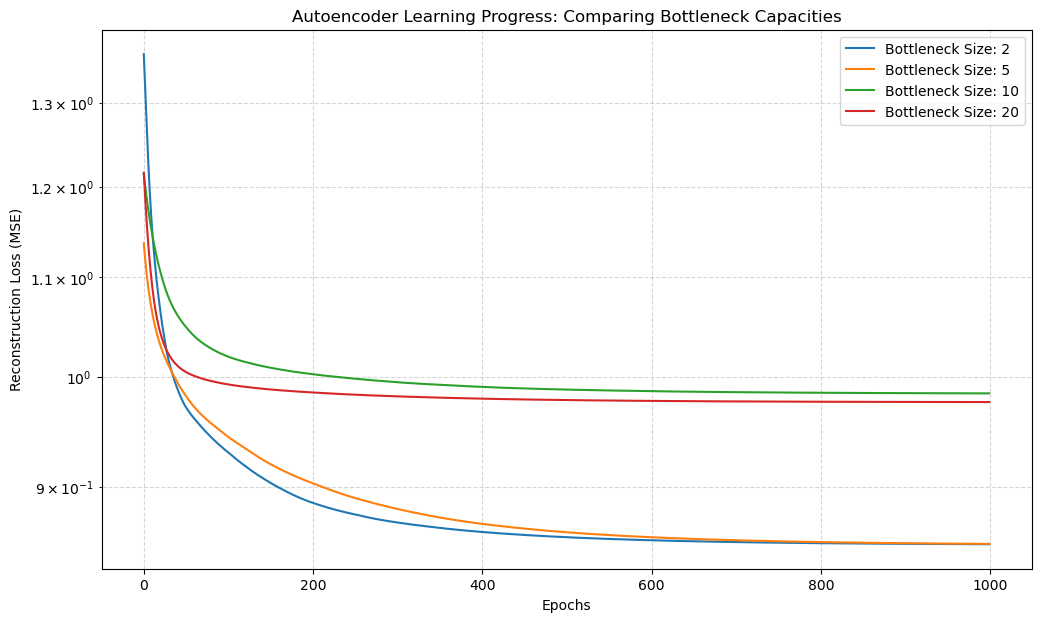

In [ ]:
import matplotlib.pyplot as plt

# Define the sizes we want to compare
bottleneck_sizes = [2, 5, 10, 20]
all_histories = {}

# Experiment Loop
for size in bottleneck_sizes:
    print(f"\nTraining Autoencoder with Bottleneck Size: {size}")

    # Initialize a fresh model for each size
    ae = Autoencoder(
        input_dim=X_scaled.shape[1],
        hidden_dims=[30, 15, 10],
        bottleneck_dim=size,
        activation='relu',
        output_activation='tanh'
    )

    # Train for 1000 epochs with slower decay
    ae.train(X_scaled, epochs=1000, batch_size=32, lr=0.001, lr_decay=0.995, l2_lambda=0.001)

    # Save history
    all_histories[size] = ae.loss_history

# --- Plotting the Results ---
plt.figure(figsize=(12, 7))

for size in bottleneck_sizes:
    plt.plot(all_histories[size], label=f'Bottleneck Size: {size}')

plt.yscale('log') # Log scale helps visualize the fine details at low loss levels
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Loss (MSE)')
plt.title('Autoencoder Learning Progress: Comparing Bottleneck Capacities')
plt.legend()
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.show()

# **K-Means**



1. Randomly intialize the intial centroids
- Randomly choose k random centroids from the dataset but poor intialization will lead to may getting stuck in bad local optima
- that is why we use Kmeans++ that ensures that there is variation between the centroids and they aren't very close to each other

2. will loop multiple of times if we need the global minimum and get the lowest squared loss error (inertia)
but nth guarantees that least error is the global

3. we iteratively do these 2 next steps until a max # of iterations or convergence (where centroids values remain the same):
- assignment: calculating the distance between every point and all k centroids and assigning the point to the cluster of the nearest centroid
- refitting: recalculating the means by getting the mean of all points in a specific cluster

4. after convergence we may caluclate the squared loss to compare it with other re-intialization

why scaled? because Kmeans is distance based algorithm the gets affected if there are any outlieirs

In [ ]:
X_scaled.shape

(569, 30)

$$||m_k - x^{(n)}||^2 = \sum_{i=1}^{d}(m_{k,i} - x_i^{(n)})^2$$

In [ ]:
def calcDistance(x,c):
  return np.sum((x-c)**2)

**2. Random initialization**

In [ ]:
def initialize_random(X,K,random_state=None):
  # K number of clusters
  if random_state is not None:
        np.random.seed(random_state)
  n_samples = X.shape[0] #569 samples
  # selecting k random points from the sample data to be the k intial centroids
  indices = np.random.choice(n_samples, K, replace=False)
  centroids = X[indices]

  return centroids



$$ P(x_{i} = D(x_i)/\sum_{j}D(x_j)) $$

**1. k-means++ intialization**

In [ ]:
def initialize_kmeansPlusPlus(X, K, random_state=None):
  if random_state is not None:
    np.random.seed(random_state)
  n_samples = X.shape[0]
  centroids = []
  # Step 1: Choose first centroid randomly
  # selecting a row randomly from 0-568
  first_index = np.random.randint(n_samples)
  # getting the data sample at index first index making it the first centroid 30*1
  centroids.append(X[first_index])

  # for the rest of the centroids
  for k in range(1, K):
    distances = []
    # for each point in the dataset
    # we are getting the distance between the point and the each centroid and then getting the closest centorid
    for x in X:
      min_dist= np.inf
      for c in centroids:
        min_dist = min(min_dist,calcDistance(x,c))
      distances.append(min_dist)
    distances = np.array(distances)

    probabilities = distances/distances.sum()

    # converting distances to probabilites and the points farther away from the existing centroids have a higher probability
    cumulative_probs = np.cumsum(probabilities)# cumilative probabilities adding at the end to 1
    r = np.random.rand()  # generating a random number between 0-1
    # Iterating list using enumerate to get both index and element
    for index, cum_prob in enumerate(cumulative_probs):
      if r <= cum_prob:
          centroids.append(X[index])
          break

  return np.array(centroids)


$$
label_i = \arg\min_j \; \|x_i - c_j\|^2
$$


In [ ]:
def assignment(X, centroids):
    n_samples = X.shape[0]
    labels = np.zeros(n_samples)

    # Looping over all samples and assigning them according to closest centroid
    for i, x in enumerate(X):
        # distances have K elements distance away from K centroids
        distances = [calcDistance(x, c) for c in centroids]
        labels[i] = np.argmin(distances)

    return labels


**Mean of points in each cluster**

In [ ]:
def refitting(X,K,labels):
  n_features = X.shape[1]
  new_centroids = np.zeros((K,n_features)) # so we are creating k arrays each with 30 elements (features)

  for k in range(K):
    x_in_cluster = X[labels==k]
    if len(x_in_cluster) == 0:
        # Empty cluster: reinitialize randomly
        new_centroids[k] = X[np.random.randint(X.shape[0])]
    else:
        new_centroids[k] = np.mean(x_in_cluster, axis=0)  # axis=0 mean of every feature together

  return new_centroids




$$
\text{Inertia} = \sum_{k=0}^{K-1} \sum_{x_i \in C_k} \|x_i - \mu_k\|^2
$$


In [ ]:
def calc_inertia(X,labels,centroids):
  K = centroids.shape[0]
  inertia = 0.0
  for k in range(K):
    x_in_cluster = X[labels==k]
    for x in x_in_cluster:
      inertia+=calcDistance(x,centroids[k])
  return inertia

In [ ]:
def k_means(X,K=3,max_iterations=100,random_state=None,init='kmeans++',tolerance=1e-4):
  # tolerance is that newCentroids = centroids (break)
  start_time = time.time()  # to get running time
  # 1. intialize
  if init == 'kmeans++':
    centroids = initialize_kmeansPlusPlus(X,K,random_state)
  else:
    centroids = initialize_random(X,K,random_state)
  inertia = []
  for i in range(max_iterations):
    # 1. assignment , 2. refitting
    # assignment
    labels = assignment(X,centroids)
    # refitting
    new_centroids = refitting(X,K,labels)
    # inertia
    inertia.append(calc_inertia(X,labels,new_centroids))

    # check convergence
    if calcDistance(centroids , new_centroids) < tolerance:
      break
    centroids = new_centroids

  #final assignment after the last refitting
  labels = assignment(X,centroids)
  final_inertia = calc_inertia(X,labels,centroids)
  end_time = time.time()
  runtime = end_time - start_time
  print(f"{init}: Runtime: {runtime:.4f} seconds")

  return labels,centroids,final_inertia,inertia,i


In [ ]:
# kmeans with random cluster intialization
labels_rand, centroids_rand, inertia_rand, history_rand, n_iter_rand = k_means(
    X_scaled, K=3, random_state=42, init='random')

labels_pp, centroids_pp, inertia_pp, history_pp, n_iter_pp = k_means(
    X_scaled, K=3, random_state=42, init='kmeans++')
print("\nRandom Initialization Results:")
print(f"Number of iterations: {n_iter_rand}")
print(f"Final inertia: {inertia_rand:.4f}")

# Compare convergence speed
print(f"\nK-Means++ converged in {n_iter_pp} iterations")
print(f"Random init converged in {n_iter_rand} iterations")
print(f"Final inertia: {inertia_pp:.4f}")



random: Runtime: 0.0587 seconds
kmeans++: Runtime: 0.0636 seconds

Random Initialization Results:
Number of iterations: 8
Final inertia: 10061.7978

K-Means++ converged in 9 iterations
Random init converged in 8 iterations
Final inertia: 10061.7978


# **Gaussian Mixture Models (GMM)**

## GMM M-Step Covariance Update Rules


---
1. intial parameters for every
gaussian mixture

Priors π

Means μ

Covariances Σ

EM
Alternate between E and M until converagence until the difference between the log likelihood is nearly less than tolerance

2. E-step
it is like the soft assignment in KMeans where we have k gaussian mixtures that have generated the data but we don't know which one has generated that specific point so we get the responsibility vector which tells us how much does that point belong to every gaussian


Good intialization for priors is that the probability of x being in a certain gaussian before seeing any data is ...

priors -> intialized to be equally probable

Means -> randomly choose K elements from the dataset and assign them to be the means of a certain gaussian


3. M-step
it is like the refitting in kmeans

we recalculate the parameters from the data we got in E

after every iteration we can keep track of the loglikelihood our aim is to maximize the loglikelihood

**E-step**

repeat until convergence:

    E-step  → compute responsibilities γ(zₖ | xᵢ)
    For every data point xᵢ, compute how much it belongs to each Gaussian.

    M-step  → update πₖ, μₖ, Σₖ
    compute log-likelihood

In [ ]:
class GMM:
    def __init__(self, n_mixtures, covariance_type='full', tolerance=1e-4, max_iter=100,random_state=None):
        self.n_mixtures = n_mixtures  # number of gaussian distribution-mixtures
        self.covariance_type = covariance_type
        self.tolerance = tolerance
        self.max_iter = max_iter

        self.prior = None
        self.means = None
        self.covariances = None
        self.random_state = random_state
        if random_state is not None:
          np.random.seed(random_state)

        # Monitoring
        self.log_likelihood_history = []

        self.regularizer = 1e-6

    def _initialize_parameters(self, X):
        numOfsamples, NumOfFeatures = X.shape
        K = self.n_mixtures

        # 1. Initializing Priors
        # full is used to create a new array with specified shape and type so prior array should have K elements and each of value 1/K
        # for example if we have 3 gaussians then each gaussian have a prior which is 1/3 because we initialize them as equally probable
        self.prior = np.full(K, 1/K)

        # 2. Initializing means
        self.means = X[np.random.choice(numOfsamples, K, replace=False)]

        # 3. Initialize covariance - ALL (K, d, d) format
        # Initial guess is that they all have a covariance based on the spread in the whole data we have
        # regularizer: we want the covariance matrix to be PD not PSD to avoid it from being singular and to be invertible

        if self.covariance_type == 'full':
            # full means that every gaussian mixture will have its own covariance
            # in total we have K*d*d
            # rowvar is to tell np that features are the columns so it is getting the correlation between features
            # features are the columns not the default (rows)
            self.covariances = np.array([
                np.cov(X, rowvar=False) + self.regularizer * np.eye(NumOfFeatures)
                for k in range(K)
            ])

        elif self.covariance_type == 'tied':
            # tied means that all of the gaussian mixtures will share the same covariance
            # d*d
            base = np.cov(X, rowvar=False) + self.regularizer * np.eye(NumOfFeatures)
            self.covariances = np.array([base.copy() for _ in range(K)])

        elif self.covariance_type == 'diagonal':
            # every gaussian has its own diagonal covariance
            # K*d*d but diagonal
            var = np.var(X, axis=0) + self.regularizer
            # compute the variance of each feature independently
            self.covariances = np.array([np.diag(var) for _ in range(K)])  # (K, d, d)

        elif self.covariance_type == 'spherical':
            # spherical means every gaussian will have a separate covariance that is diagonal (axis aligned and spherical with equal eigen values)
            var = np.mean(np.var(X, axis=0)) + self.regularizer
            # getting the avg over all the variances of the features (for all features to have the same variance = eigen values)
            # to make sure that the variances are equal to have equal eigen values
            self.covariances = np.array([np.eye(NumOfFeatures) * var for _ in range(K)])  # (K, d, d)

    def gaussian(self, X, mean, covariance):
        # number of features
        d = X.shape[1]
        diff = X - mean

        # covariance is always (d, d) now
        cov = covariance

        inv_cov = np.linalg.inv(cov)
        det_cov = np.linalg.det(cov)

        norm_const = 1.0 / np.sqrt((2 * np.pi) ** d * det_cov)
        exponent = -0.5 * np.sum(diff @ inv_cov * diff, axis=1)  # got exponent of all N samples at one go
        # axis = 1 summing the rows together
        return norm_const * np.exp(exponent)

    def e_step(self, X):
        N = X.shape[0]  # number of samples
        K = self.n_mixtures

        # responsibility vector for each sample point each of them has K
        # values representing the probability that this point falls into
        # each gaussian by how much
        responsibilities = np.zeros((N, K))

        for k in range(K):
            # for all sample points we are getting the Kth element in its
            # responsibility vector (probability of each of them to belong to the k gaussian)
            responsibilities[:, k] = (
                self.prior[k] * self.gaussian(X, self.means[k], self.covariances[k])
            )

        # normalize so each row sums to 1
        # till this point we got N*prior we need to sum all of them to divide by them to be normalized
        # dividing by evidence
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
        self.responsibilities = responsibilities
        return responsibilities

    def m_step(self, X, R):
        N, d = X.shape
        K = R.shape[1]
        covariances = []

        for k in range(K):
            # total responsibility for gaussian k
            total_R_k = np.sum(R[:, k])

            # 1. prior prediction
            # πₖ = (1/N) Σᵢ rᵢₖ
            self.prior[k] = total_R_k / N

            # 2. mean prediction
            # μₖ = (Σᵢ rᵢₖ · xᵢ) / (Σᵢ rᵢₖ)
            mean = np.sum(R[:, k].reshape(-1, 1) * X, axis=0) / total_R_k
            self.means[k] = mean

            # 3. Covariance prediction - ALL stored as (d, d)
            if self.covariance_type == 'full':
                cov = np.zeros((d, d))
                for i in range(N):
                    diff = (X[i] - mean).reshape(-1, 1)
                    cov += R[i, k] * (diff @ diff.T)
                cov /= total_R_k
                cov += self.regularizer * np.eye(d)
                covariances.append(cov)

            elif self.covariance_type == 'tied':
                cov = np.zeros((d, d))
                for i in range(N):
                    diff = (X[i] - mean).reshape(-1, 1)
                    cov += R[i, k] * (diff @ diff.T)
                covariances.append(cov)

            elif self.covariance_type == 'diagonal':
                var = np.zeros(d)
                for i in range(N):
                    var += R[i, k] * (X[i] - mean) ** 2
                var /= total_R_k
                var += self.regularizer  # they are already the diagonals
                covariances.append(np.diag(var))  # (d, d)

            elif self.covariance_type == 'spherical':
                total = 0
                for i in range(N):
                    total += R[i, k] * np.sum((X[i] - mean) ** 2)
                # averaging per feature that is /d
                sigma2 = total / (total_R_k * d)
                sigma2 += self.regularizer
                covariances.append(np.eye(d) * sigma2)  # (d, d), σ²I

        # For tied covariance, sum all covs and divide by N
        # average cov over all points
        if self.covariance_type == 'tied':
            tied_cov = sum(covariances) / N + self.regularizer * np.eye(d)
            self.covariances = np.array([tied_cov.copy() for _ in range(K)])
        else:
            self.covariances = np.array(covariances)

    def compute_log_likelihood(self, X):
        N = X.shape[0]
        K = self.n_mixtures
        likelihood = np.zeros((N, K))

        for k in range(K):
            # N*K -> each row represents the likelihood of x with respect to K gaussians
            # each element in the row represents the likelihood with 1 gaussian
            likelihood[:, k] = self.prior[k] * self.gaussian(X, self.means[k], self.covariances[k])

        # log-likelihood = sum over all data points of log(sum over all components)
        log_likelihood = np.sum(np.log(np.sum(likelihood, axis=1)))
        return log_likelihood

    def fit(self, X):
        # 1. Initialize parameters
        self._initialize_parameters(X)

        # 2. EM loop
        for iteration in range(self.max_iter):
            # E-step
            R = self.e_step(X)
            # M-step
            self.m_step(X, R)
            # Compute log-likelihood
            loglikeli = self.compute_log_likelihood(X)
            self.log_likelihood_history.append(loglikeli)

            if iteration > 0 and abs(self.log_likelihood_history[iteration] - self.log_likelihood_history[iteration-1]) < self.tolerance:
                print(f"converged at iteration {iteration}")
                break



## 1. Full Covariance

$$
\Sigma_k = \frac{\sum_{i=1}^{N} r_{ik} (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i=1}^{N} r_{ik}}
$$

- Each Gaussian has its **own covariance matrix**  
- Off-diagonal elements capture **correlation between features**  

---

## 2. Tied Covariance

$$
\Sigma_{\text{tied}} = \frac{\sum_{k=1}^{K} \sum_{i=1}^{N} r_{ik} (x_i - \mu_k)(x_i - \mu_k)^T}{N}
$$

- All Gaussians **share the same covariance matrix**  
- Assumes clusters have **same shape/orientation**  

---

## 3. Diagonal Covariance

$$
\Sigma_k = \text{diag}\left(\frac{\sum_{i=1}^{N} r_{ik} (x_i - \mu_k)^2}{\sum_{i=1}^{N} r_{ik}}\right)
$$

- Only **variances along each feature** are kept  
- Off-diagonal elements are **zero**  

---

## 4. Spherical Covariance

$$
\sigma_k^2 = \frac{\sum_{i=1}^{N} r_{ik} \|x_i - \mu_k\|^2}{d \sum_{i=1}^{N} r_{ik}}, \quad
\Sigma_k = \sigma_k^2 I_d
$$

- Single scalar variance per Gaussian  
- Equal variance along all axes → circular Gaussian  
- Off-diagonal elements = 0  


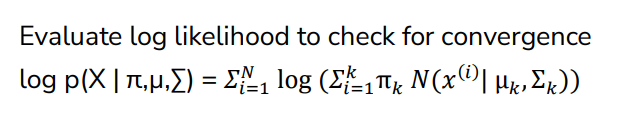

# **Evaluation & Analysis**

## **Internal Validation Metrics**

### Silhouette Score
- Measures how similar an object is to its own cluster compared to other clusters.
- Ranges from -1 to 1, where a higher value indicates better-defined clusters.

For each data point \(i\):
- $a(i)$: average distance to all other points in the same cluster.
- $b(i)$: average distance to all points in the other clusters.
The silhouette score $s(i)$ for point $i$ is calculated as:
$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Range of $s(i)$:
- $s(i) \approx 1$: Point is well clustered.
- $s(i) \approx 0$: Point is on or very close to the decision boundary between two clusters.
- $s(i) \approx -1$: Point may have been assigned to the wrong cluster.

The overall silhouette score for the dataset is the average of $s(i)$ over all points.

In [ ]:
def silhouette_score(X, labels):

    # X: data points, shape (n_samples, n_features)
    # labels: cluster labels for each point, shape (n_samples,)

    n_samples = X.shape[0]                # number of samples
    unique_labels = np.unique(labels)     # unique cluster labels
    K = len(unique_labels)                # number of clusters

    # Silhouette score is undefined for 1 cluster or all points in separate clusters
    # or every point in separate cluster
    if K == 1 or K == n_samples:
        return 0.0

    silhouette_vals = np.zeros(n_samples) # silhouette value for each sample - array of size n_samples initialized to zeros

    # Calculate silhouette value for each sample
    for i in range(n_samples):

        same_cluster = X[labels == labels[i]] # points in the same cluster as point i
        other_clusters = [X[labels == label] for label in unique_labels if label != labels[i]] # points in other clusters
        # other_clusters is a list of arrays, each array contains points from one of the other clusters

        # a(i): mean distance to other points in the same cluster - intra cluster distance
        if len(same_cluster) > 1:
            # for point i, calculate mean distance to all other points in the same cluster
            a_i = np.mean([np.linalg.norm(X[i] - point) for point in same_cluster if not np.array_equal(point, X[i])])
        else:
            a_i = 0.0

        # b(i): mean distance to points in the nearest cluster - nearest cluster distance
        # for point i, calculate mean distance to all points in each of the other clusters, take the minimum
        b_i = np.min([np.mean([np.linalg.norm(X[i] - point) for point in cluster]) for cluster in other_clusters])

        # Silhouette value for point i
        silhouette_vals[i] = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) > 0 else 0.0

    return np.mean(silhouette_vals)

# Example usage:
best_silhouette = -1
best_k = None
for k in range(2, 11):
    labels, centroids, final_inertia, inertia_history, n_iter = k_means(
        X_scaled,
        K=k,
        init='kmeans++',
        tolerance=1e-4,
        random_state=42
    )
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.4f}")
    if score > best_silhouette:
        best_silhouette = score
        best_k = k


kmeans++: Runtime: 0.0260 seconds
K=2, Silhouette Score=0.3434
kmeans++: Runtime: 0.0620 seconds
K=3, Silhouette Score=0.3144
kmeans++: Runtime: 0.0515 seconds
K=4, Silhouette Score=0.1571
kmeans++: Runtime: 0.0846 seconds
K=5, Silhouette Score=0.1434
kmeans++: Runtime: 0.1563 seconds
K=6, Silhouette Score=0.1479
kmeans++: Runtime: 0.1743 seconds
K=7, Silhouette Score=0.1316
kmeans++: Runtime: 0.2486 seconds
K=8, Silhouette Score=0.1434
kmeans++: Runtime: 0.3385 seconds
K=9, Silhouette Score=0.1359
kmeans++: Runtime: 0.4710 seconds
K=10, Silhouette Score=0.1567


### Davies-Bouldin Index
- Measures the average similarity ratio of each cluster with its most similar cluster.
- Measures intra-cluster spread relative to inter-cluster separation.

For clusters $C_i$ and $C_j$:
- $S_i$: average distance between each point in cluster $C_i$ and the centroid of $C_i$.
- $M_{ij}$: distance between centroids of clusters $C_i$ and $C_j$.
The Davies-Bouldin index $DB$ is calculated as:
$$
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{S_i + S_j}{M_{ij}} \right)
$$  
Where $k$ is the number of clusters.

A lower Davies-Bouldin index indicates better clustering, as it signifies that clusters are compact and well-separated.

A good clustering solution should have:
- Compact clusters (low intra-cluster distance) -> points within a cluster are close to each other
- Well-separated clusters (high inter-cluster distance) -> centroids of different clusters are far apart

DBI measures **cluster overlap** and **separation**.

#### Steps to compute DBI:
For each cluster $i$:
1. Compute $S_i$ (intra-cluster distance).
$$
S_i = \frac{1}{|C_i|} \sum_{x \in C_i} ||x - \mu_i||
$$
Where $\mu_i$ is the centroid of cluster $C_i$.

2. Compute $M_{ij}$ (inter-cluster distance) for all $j \neq i$.
$$
M_{ij} = ||\mu_i - \mu_j||
$$

3. Compute the ratio

$$
R_{ij} = \frac{S_i + S_j}{M_{ij}}
$$
for all $j \neq i$.

Large when:
- Clusters are wide (large $S_i$, $S_j$)

- Clusters are close together (small $M_{ij}$)

4. Find the maximum ratio for cluster $i$:
$$
R_i = \max_{j \neq i} R_{ij}
$$
5. Compute the overall DBI:
$$
DB = \frac{1}{k} \sum_{i=1}^{k} R_i
$$
A lower Davies-Bouldin index indicates better clustering, as it signifies that clusters are compact and well-separated.

In [ ]:
def davies_bouldin_index(X, labels):
    n_clusters = len(np.unique(labels)) # number of clusters
    cluster_means = np.array([X[labels == k].mean(axis=0) for k in range(n_clusters)]) # mean of each cluster - centroid
    # for each cluster, calculate the average distance of points in the cluster to the cluster mean
    cluster_scatters = np.array([np.mean(np.linalg.norm(X[labels == k] - cluster_means[k], axis=1)) for k in range(n_clusters)]) # intra-cluster distance

    db_index = 0.0

    # For each cluster, find the maximum ratio of (scatter_i + scatter_j) / distance(mean_i, mean_j)
    for i in range(n_clusters):
        max_ratio = 0.0
        # Compare cluster i with every other cluster j to find the maximum ratio (most similar cluster)
        for j in range(n_clusters):
            if i != j:
                distance = np.linalg.norm(cluster_means[i] - cluster_means[j]) # distance between cluster means
                ratio = (cluster_scatters[i] + cluster_scatters[j]) / distance # ratio of intra-cluster scatter to inter-cluster distance
                max_ratio = max(max_ratio, ratio) # keep track of the maximum ratio for cluster i

        db_index += max_ratio # sum of maximum ratios for all clusters

    db_index /= n_clusters # average over all clusters
    return db_index

# Example usage:
best_db_index = float('inf')
best_k_db = None
for k in range(2, 11):
    labels, centroids, final_inertia, inertia_history, n_iter = k_means(
        X_scaled,
        K=k,
        init='kmeans++',
        tolerance=1e-4,
        random_state=42
    )
    db_index = davies_bouldin_index(X_scaled, labels)
    print(f"K={k}, Davies-Bouldin Index={db_index:.4f}")
    if db_index < best_db_index:
        best_db_index = db_index
        best_k_db = k


kmeans++: Runtime: 0.0260 seconds
K=2, Davies-Bouldin Index=1.3205
kmeans++: Runtime: 0.0612 seconds
K=3, Davies-Bouldin Index=1.5294
kmeans++: Runtime: 0.0505 seconds
K=4, Davies-Bouldin Index=1.8763
kmeans++: Runtime: 0.0844 seconds
K=5, Davies-Bouldin Index=1.8565
kmeans++: Runtime: 0.1012 seconds
K=6, Davies-Bouldin Index=1.6394
kmeans++: Runtime: 0.1726 seconds
K=7, Davies-Bouldin Index=1.5455
kmeans++: Runtime: 0.2513 seconds
K=8, Davies-Bouldin Index=1.4686
kmeans++: Runtime: 0.3361 seconds
K=9, Davies-Bouldin Index=1.3114
kmeans++: Runtime: 0.4696 seconds
K=10, Davies-Bouldin Index=1.4446


### Calinski-Harabasz Index
- Also known as the Variance Ratio Criterion.
- Measures the ratio of between-cluster dispersion (how far cluster centroids are from the overall mean) to within-cluster dispersion (how compact the clusters are).
The Calinski-Harabasz index $CH$ is calculated as:
$$
CH = \frac{B}{W} \times \frac{n - k}{k - 1}
$$
Where:

- $B$: between-cluster dispersion:
$$
B = \sum_{i=1}^{k} |C_i| \cdot ||\mu_i - \mu||^2
$$
Measures how far cluster centers are from the global mean

Why multiply by 𝑛𝑘?Because:

A cluster with more points should contribute more to the score

A tiny cluster far away shouldn’t dominate the metric unfairly
nk
	acts as a weight.
- $\mu$: overall mean of the data points.
- $W$: within-cluster dispersion:
$$
W = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$
- $n$: total number of data points.
- $k$: number of clusters.

Small when:

- Points are close to centroids
- Clusters are tight

A higher Calinski-Harabasz index indicates better clustering, as it signifies that clusters are well-separated and compact.


----------------------------------
some Notes:

Numerator:
𝐵/𝐾−1

This is:
Average separation per cluster



Denominator
𝑊/𝑁−𝐾

This is:

Average spread per point around its cluster center

CH=

average separation per cluster / average spread per point
	​


In [ ]:
def calinski_harabasz_index(X, labels):
    n_samples, n_features = X.shape # number of samples and features
    n_clusters = len(np.unique(labels)) # number of clusters

    overall_mean = np.mean(X, axis=0) # overall mean of the data - global centroid

    # Between-cluster dispersion
    B = 0.0
    # for each cluster, calculate the squared distance between the cluster mean and overall mean, weighted by number of points in the cluster
    for k in range(n_clusters):
        cluster_points = X[labels == k]
        n_k = cluster_points.shape[0] # number of points in cluster k
        cluster_mean = np.mean(cluster_points, axis=0) # mean of cluster k - local centroid
        B += n_k * np.linalg.norm(cluster_mean - overall_mean) ** 2 # weighted squared distance

    # Within-cluster dispersion
    W = 0.0
    # for each cluster, calculate the sum of squared distances of points to the cluster mean
    for k in range(n_clusters):
        cluster_points = X[labels == k]
        cluster_mean = np.mean(cluster_points, axis=0) # mean of cluster k - local centroid
        W += np.sum(np.linalg.norm(cluster_points - cluster_mean, axis=1) ** 2) # sum of squared distances - sum of intra-cluster variance

    # Calinski-Harabasz Index
    # calculated as (B/(k-1)) / (W/(n-k))
    # where B is between-cluster dispersion, W is within-cluster dispersion, n is number of samples, k is number of clusters
    ch_index = (B / (n_clusters - 1)) / (W / (n_samples - n_clusters))

    return ch_index

# Example usage:
best_ch_index = -1
best_k_ch = None
for k in range(2, 11):
    labels, centroids, final_inertia, inertia_history, n_iter = k_means(
        X_scaled,
        K=k,
        init='kmeans++',
        tolerance=1e-4,
        random_state=42
    )
    ch_index = calinski_harabasz_index(X_scaled, labels)
    print(f"K={k}, Calinski-Harabasz Index={ch_index:.4f}")
    if ch_index > best_ch_index:
        best_ch_index = ch_index
        best_k_ch = k


kmeans++: Runtime: 0.0265 seconds
K=2, Calinski-Harabasz Index=267.6917
kmeans++: Runtime: 0.0619 seconds
K=3, Calinski-Harabasz Index=197.1140
kmeans++: Runtime: 0.0505 seconds
K=4, Calinski-Harabasz Index=155.8915
kmeans++: Runtime: 0.0855 seconds
K=5, Calinski-Harabasz Index=129.8912
kmeans++: Runtime: 0.1017 seconds
K=6, Calinski-Harabasz Index=116.3712
kmeans++: Runtime: 0.1745 seconds
K=7, Calinski-Harabasz Index=110.0315
kmeans++: Runtime: 0.2510 seconds
K=8, Calinski-Harabasz Index=107.8533
kmeans++: Runtime: 0.3380 seconds
K=9, Calinski-Harabasz Index=92.2541
kmeans++: Runtime: 0.4703 seconds
K=10, Calinski-Harabasz Index=92.1368


### WCSS (Within-Cluster Sum of Squares)
- Measures the total squared distance between each point and the centroid of its assigned cluster.
The WCSS for a clustering solution is calculated as:
$$
WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$
Where:
- $C_i$: cluster $i$.
- $\mu_i$: centroid of cluster $C_i$.

A lower WCSS indicates better clustering, as it signifies that points are closer to their respective cluster centroids, resulting in more compact clusters.

In [ ]:
def within_cluster_sum_of_squares(X, labels, centroids):
    wcss = 0.0
    K = centroids.shape[0]
    # For each cluster, sum the squared distances of points to their cluster centroid
    for k in range(K):
        cluster_points = X[labels == k]
        # Sum of squared distances for points in cluster k
        for point in cluster_points:
            wcss += np.linalg.norm(point - centroids[k]) ** 2
    return wcss

# Example usage:
best_wcss = float('inf')
best_k_wcss = None
for k in range(2, 11):
    labels, centroids, final_inertia, inertia_history, n_iter = k_means(
        X_scaled,
        K=k,
        init='kmeans++',
        tolerance=1e-4,
        random_state=42
    )
    wcss = within_cluster_sum_of_squares(X_scaled, labels, centroids)
    print(f"K={k}, WCSS={wcss:.4f}")
    if wcss < best_wcss:
        best_wcss = wcss
        best_k_wcss = k

kmeans++: Runtime: 0.0241 seconds
K=2, WCSS=11595.5266
kmeans++: Runtime: 0.0605 seconds
K=3, WCSS=10061.7978
kmeans++: Runtime: 0.0502 seconds
K=4, WCSS=9339.3911
kmeans++: Runtime: 0.0841 seconds
K=5, WCSS=8885.0056
kmeans++: Runtime: 0.1012 seconds
K=6, WCSS=8394.4252
kmeans++: Runtime: 0.1737 seconds
K=7, WCSS=7849.3084
kmeans++: Runtime: 0.2513 seconds
K=8, WCSS=7276.9485
kmeans++: Runtime: 0.3365 seconds
K=9, WCSS=7364.3734
kmeans++: Runtime: 0.5033 seconds
K=10, WCSS=6873.5905


### Log-Likelihood (for GMM)
- Measures how well the Gaussian Mixture Model (GMM) fits the data.
The log-likelihood
$LL$ of the data given the GMM parameters is calculated as:
$$
LL = \sum_{i=1}^{n} \log \left( \sum_{j=1}^{k} \pi_j \cdot \mathcal{N}(x_i | \mu_j, \Sigma_j) \right)
$$
Where:
- $n$: total number of data points.
- $k$: number of Gaussian components (clusters).
- $\pi_j$: weight of the $j$-th Gaussian component.- $\mathcal{N}(x_i | \mu_j, \Sigma_j)$: probability density function of the $j$-th Gaussian component evaluated at point $x_i$.

In [ ]:
def log_likelihood_gmm(X, gmm):
    N = X.shape[0]
    K = gmm.n_mixtures
    likelihood = np.zeros((N, K))

    for k in range(K):
        likelihood[:, k] = gmm.prior[k] * gmm.gaussian(X, gmm.means[k], gmm.covariances[k])

    log_likelihood = np.sum(np.log(np.sum(likelihood, axis=1)))
    return log_likelihood

### AIC (Akaike Information Criterion)
- AIC is used to compare different statistical models, balancing model fit and complexity.
The AIC for a GMM is calculated as:
$$
AIC = 2p - 2LL
$$
Where:
- $p$: number of parameters in the model.
- $LL$: log-likelihood of the model.

THE TRADE-OFF PROBLEM:
--------------------------
- More components (k) → Better fit to data → Higher log-likelihood

- But also → More complex model → Risk of overfitting

BIC and AIC solve this by PENALIZING complexity!


- LOWER is BETTER (both for AIC and BIC)
- They balance: how well the parameters fit the data (LL) vs complexity (p) avoiding overfitting

In [ ]:
def AIC_gmm(X, gmm):
    log_likelihood = log_likelihood_gmm(X, gmm)
    K = gmm.n_mixtures
    d = X.shape[1]

    # Number of parameters
    n_params = K - 1 + K * d  # priors and means

    if gmm.covariance_type == 'full':
        n_params += K * (d * (d + 1)) / 2
    elif gmm.covariance_type == 'tied':
        n_params += (d * (d + 1)) / 2
    elif gmm.covariance_type == 'diagonal':
        n_params += K * d
    elif gmm.covariance_type == 'spherical':
        n_params += K

    aic = 2 * n_params - 2 * log_likelihood
    return aic

### BIC (Bayesian Information Criterion)
- BIC is similar to AIC but imposes a larger penalty for models with more parameters.
The BIC for a GMM is calculated as:
$$
BIC = p \cdot \log(n) - 2LL
$$
Where:
- $p$: number of parameters in the model.
- $n$: number of data points.
- $LL$: log-likelihood of the model.

In [ ]:
def BIC_gmm(X, gmm):
    log_likelihood = log_likelihood_gmm(X, gmm)
    K = gmm.n_mixtures
    d = X.shape[1]
    N = X.shape[0]

    # Number of parameters
    n_params = K - 1 + K * d  # priors and means

    if gmm.covariance_type == 'full':
        n_params += K * (d * (d + 1)) / 2
    elif gmm.covariance_type == 'tied':
        n_params += (d * (d + 1)) / 2
    elif gmm.covariance_type == 'diagonal':
        n_params += K * d
    elif gmm.covariance_type == 'spherical':
        n_params += K

    bic = np.log(N) * n_params - 2 * log_likelihood
    return bic

## **External Validation Metrics**

### Adjusted Rand Index (ARI)
- Measures the similarity between two clustering solutions, adjusted for chance.
The Adjusted Rand Index $ARI$ is calculated as:
$$
ARI = \frac{RI - E[RI]}{\max(RI) - E[RI]}
$$
Where:
- $RI$: Rand Index, which counts the number of pairs of points that are either in the same cluster or in different clusters in both clustering solutions.
- $E[RI]$: expected value of the Rand Index for random clusterings.
- $\max(RI)$: maximum possible value of the Rand Index.

ARI counts how many pairs of points your clustering grouped correctly, subtracts what would happen by chance, and normalizes the result.

In [ ]:
from collections import Counter
from math import comb
from itertools import combinations

def adjusted_rand_index(true_labels, pred_labels):
    n = len(true_labels)
    if n != len(pred_labels):
        raise ValueError("Label arrays must be of the same length.")

    # Map each unique label to an index
    label_true_ids = {label: idx for idx, label in enumerate(np.unique(true_labels))}
    label_pred_ids = {label: idx for idx, label in enumerate(np.unique(pred_labels))}
    n_true = len(label_true_ids)    # number of unique true labels
    n_pred = len(label_pred_ids)    # number of unique predicted labels

    # Build contingency table
    # contingency[i][j] = number of samples in true cluster i and predicted cluster j
    # each row corresponds to a true label, each column to a predicted label
    # table size is (n_true x n_pred)
    # Table counts how many samples are shared between each pair of true and predicted clusters
    contingency = np.zeros((n_true, n_pred), dtype=int)
    for t, p in zip(true_labels, pred_labels):
        contingency[label_true_ids[t], label_pred_ids[p]] += 1
    # pairs that agree in both true and predicted
    # it counts how many pair of points are
    # 1. in the same true class , 2. and the same predicted cluster
    # !! Pairs that are same true class AND same cluster
    sum_comb_c = sum(comb(n_ij, 2) for n_ij in contingency.flatten())
    # pairs that are in the same true class regardless the cluster
    sum_comb_rows = sum(comb(n_i, 2) for n_i in contingency.sum(axis=1))
    # pairs in the same predicted cluster regardless class
    sum_comb_cols = sum(comb(n_j, 2) for n_j in contingency.sum(axis=0))
    # total # of pairs
    total_comb = comb(n, 2)

    # Adjusted Rand Index calculation
    # How many pairs would agree by chance if clustering were random?
    expected_index = (sum_comb_rows * sum_comb_cols) / total_comb if total_comb > 0 else 0 # expected index
    max_index = (sum_comb_rows + sum_comb_cols) / 2 # maximum index
    ari = (sum_comb_c - expected_index) / (max_index - expected_index) if (max_index - expected_index) > 0 else 0.0
    return ari


### Normalized Mutual Information (NMI)
- Measures the similarity between the true labels and the clustering labels.
- Ranges from 0 to 1, where 1 indicates perfect agreement between the two

In [ ]:
from math import log

def normalized_mutual_info(true_labels, pred_labels):

    n = len(true_labels)
    if n != len(pred_labels):
        raise ValueError("Label arrays must be of the same length.")

    # Build contingency table
    label_true_ids = {label: idx for idx, label in enumerate(np.unique(true_labels))}
    label_pred_ids = {label: idx for idx, label in enumerate(np.unique(pred_labels))}
    n_true = len(label_true_ids)
    n_pred = len(label_pred_ids)

    contingency = np.zeros((n_true, n_pred), dtype=int)
    for t, p in zip(true_labels, pred_labels):
        contingency[label_true_ids[t], label_pred_ids[p]] += 1

    # Calculate mutual information
    mi = 0.0
    for i in range(n_true):
        for j in range(n_pred):
            if contingency[i][j] > 0:
                pij = contingency[i][j] / n
                pi = contingency[i].sum() / n
                pj = contingency[:, j].sum() / n
                mi += pij * log(pij / (pi * pj))

    # Calculate entropies
    h_true = -sum((contingency[i].sum() / n) * log(contingency[i].sum() / n) for i in range(n_true) if contingency[i].sum() > 0)
    h_pred = -sum((contingency[:, j].sum() / n) * log(contingency[:, j].sum() / n) for j in range(n_pred) if contingency[:, j].sum() > 0)

    # Normalize mutual information
    nmi = mi / ((h_true + h_pred) / 2) if (h_true + h_pred) > 0 else 0.0
    return nmi

### Purity
- Measures the extent to which clusters contain a single class.
The purity for a clustering solution is calculated as:
$$
Purity = \frac{1}{n} \sum_{i=1}^{k} \max_{j} |C_i \cap L_j|
$$
Where:
- $n$: total number of data points.
- $k$: number of clusters.
- $C_i$: cluster $i$.
- $L_j$: true class label $j$.
- $|C_i \cap L_j|$: number of data points in cluster $C_i$ that belong to class $L_j$.

In [ ]:
def purity(true_labels, pred_labels):
    n = len(true_labels)
    clusters = np.unique(pred_labels)
    purity_sum = 0
    for cluster in clusters:
        cluster_points = true_labels[pred_labels == cluster]
        if len(cluster_points) == 0:
            continue
        majority_class = np.max(np.bincount(cluster_points))
        purity_sum += majority_class
    return purity_sum / n

# **Experiments**

# **Experiment1:  K-Means on original data**

**1. elbow Method**

kmeans++: Runtime: 0.0687 seconds
random: Runtime: 0.0439 seconds
K=2: K-Means++ Inertia=11595.53, Random Inertia=11595.68, Kmeans++ maxIterations=3, Kmeans maxIter=8
kmeans++: Runtime: 0.0629 seconds
random: Runtime: 0.0543 seconds
K=3: K-Means++ Inertia=10061.80, Random Inertia=10061.80, Kmeans++ maxIterations=9, Kmeans maxIter=8
kmeans++: Runtime: 0.0612 seconds
random: Runtime: 0.1067 seconds
K=4: K-Means++ Inertia=9339.39, Random Inertia=9409.83, Kmeans++ maxIterations=5, Kmeans maxIter=14
kmeans++: Runtime: 0.0894 seconds
random: Runtime: 0.1294 seconds
K=5: K-Means++ Inertia=8885.01, Random Inertia=8564.40, Kmeans++ maxIterations=8, Kmeans maxIter=15
kmeans++: Runtime: 0.1041 seconds
random: Runtime: 0.2247 seconds
K=6: K-Means++ Inertia=8394.43, Random Inertia=8171.85, Kmeans++ maxIterations=8, Kmeans maxIter=23
kmeans++: Runtime: 0.1729 seconds
random: Runtime: 0.2171 seconds
K=7: K-Means++ Inertia=7849.31, Random Inertia=7763.15, Kmeans++ maxIterations=14, Kmeans maxIter=12
k

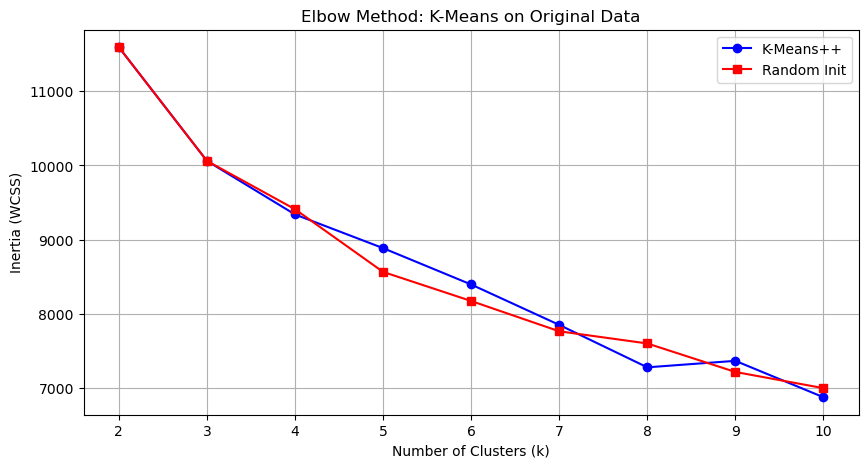

In [ ]:
k_range = range(2, 11)
inertias_kpp = []
inertias_random = []

for k in k_range:
    # K-Means++
    labels_kpp, centroids_kpp, inertia_kpp, _, max_iter_kpp = k_means(
        X_scaled, K=k, init='kmeans++', random_state=42
    )
    inertias_kpp.append(inertia_kpp)

    # Random initialization
    labels_rand, centroids_rand, inertia_rand, _, max_iter_rand = k_means(
        X_scaled, K=k, init='random', random_state=42
    )
    inertias_random.append(inertia_rand)

    print(f"K={k}: K-Means++ Inertia={inertia_kpp:.2f}, Random Inertia={inertia_rand:.2f}, Kmeans++ maxIterations={max_iter_kpp}, Kmeans maxIter={max_iter_rand}")

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertias_kpp, 'bo-', label='K-Means++')
plt.plot(k_range, inertias_random, 'rs-', label='Random Init')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method: K-Means on Original Data')
plt.legend()
plt.grid(True)
plt.show()


- covergence speed:
sometimes kmeans++ will converge a little faster as we can see in the # of iterations because it has intialized better than the random kmean

- what differs between kmean random and kmean++ is the intialization kmeans++ gaurantees that the intial centroids where chosen well and will avoid getting stuck in a bad local minimum

**in elbow**
- kmeans++ I see that the optimal K would be at 8 where after there wasn't that much of an improvement
- in kmeans it is less obvious but the fast drop was till around 7 then later there wasn't much -> will then be close to converagence not much of an improvement


1.2: Silhouette Analysis
----------------------------------------
kmeans++: Runtime: 0.0363 seconds
random: Runtime: 0.0457 seconds
K=2: K-Means++ Silhouette=0.3434, Random Silhouette=0.3447
kmeans++: Runtime: 0.0629 seconds
random: Runtime: 0.0537 seconds
K=3: K-Means++ Silhouette=0.3144, Random Silhouette=0.3144
kmeans++: Runtime: 0.0519 seconds
random: Runtime: 0.1021 seconds
K=4: K-Means++ Silhouette=0.1571, Random Silhouette=0.2504
kmeans++: Runtime: 0.0876 seconds
random: Runtime: 0.1281 seconds
K=5: K-Means++ Silhouette=0.1434, Random Silhouette=0.1675
kmeans++: Runtime: 0.1008 seconds
random: Runtime: 0.2635 seconds
K=6: K-Means++ Silhouette=0.1479, Random Silhouette=0.1592
kmeans++: Runtime: 0.1803 seconds
random: Runtime: 0.1342 seconds
K=7: K-Means++ Silhouette=0.1316, Random Silhouette=0.1580
kmeans++: Runtime: 0.3134 seconds
random: Runtime: 0.1584 seconds
K=8: K-Means++ Silhouette=0.1434, Random Silhouette=0.1441
kmeans++: Runtime: 0.3414 seconds
random: Runtime: 0.3382 

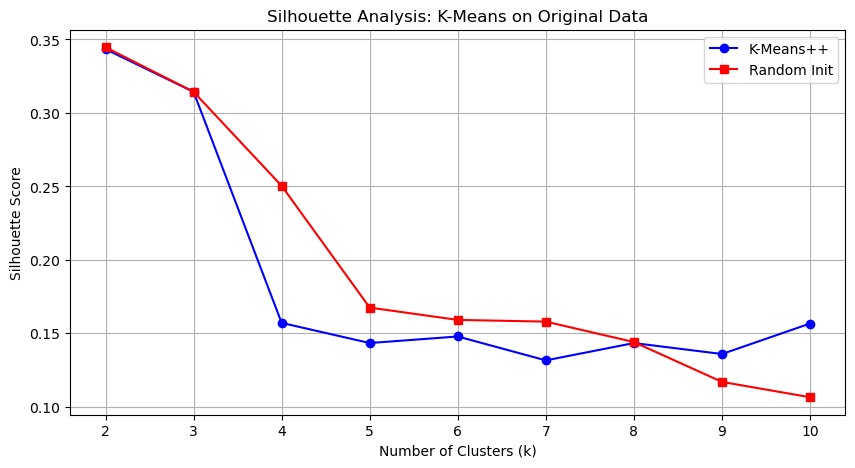


Optimal k by Silhouette Score: 2


In [ ]:

# Silhouette Analysis
print("\n1.2: Silhouette Analysis")
print("-" * 40)

silhouette_scores_kpp = []
silhouette_scores_random = []

for k in k_range:
    # K-Means++
    labels_kpp, _, _, _, _ = k_means(X_scaled, K=k, init='kmeans++', random_state=42)
    score_kpp = silhouette_score(X_scaled, labels_kpp)
    silhouette_scores_kpp.append(score_kpp)

    # Random initialization
    labels_rand, _, _, _, _ = k_means(X_scaled, K=k, init='random', random_state=42)
    score_rand = silhouette_score(X_scaled, labels_rand)
    silhouette_scores_random.append(score_rand)

    print(f"K={k}: K-Means++ Silhouette={score_kpp:.4f}, Random Silhouette={score_rand:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores_kpp, 'bo-', label='K-Means++')
plt.plot(k_range, silhouette_scores_random, 'rs-', label='Random Init')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis: K-Means on Original Data')
plt.legend()
plt.grid(True)
plt.show()

best_k_silhouette = k_range[np.argmax(silhouette_scores_kpp)]
print(f"\nOptimal k by Silhouette Score: {best_k_silhouette}")

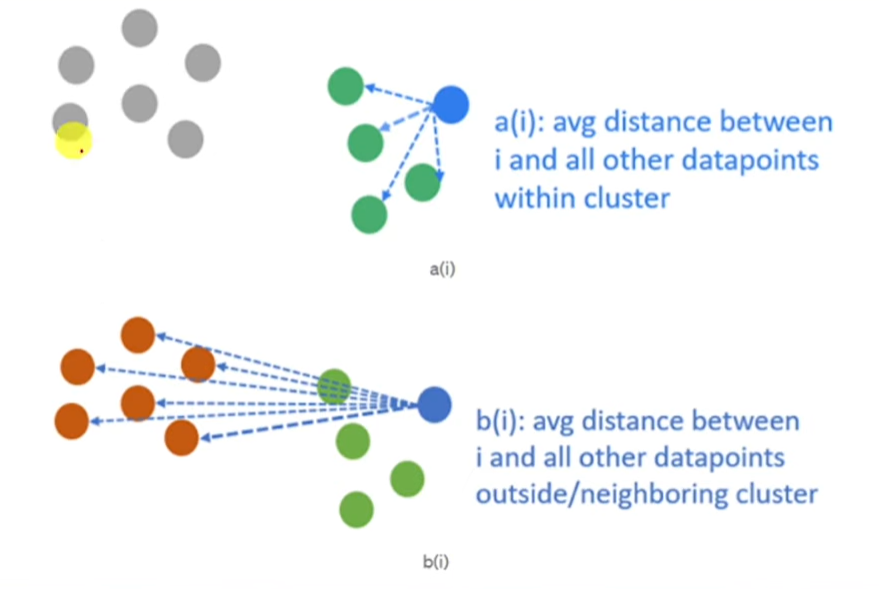

With silhouette we are trying to see what clusters can make the points within a cluster very close

and clusters themselves away from each other

**Gap statistics**


Are my clusters REAL, or could I get similar results from random noise?

trying to decide if k=3 is a good choice:

Cluster real data with k=3

Calculate inertia (how tight the clusters are) squared error loss


Generate random data (same shape/size as your data, but totally random - no real patterns)

Cluster this random data with k=3
Calculate its inertia


Compare them:

If real data has MUCH lower inertia than random data → Real structure exists
If your real data has similar inertia to random data →  No real structure, just noise



1.3: Gap Statistic
----------------------------------------
kmeans++: Runtime: 0.0292 seconds
kmeans++: Runtime: 0.0639 seconds
kmeans++: Runtime: 0.1273 seconds
kmeans++: Runtime: 0.0604 seconds
kmeans++: Runtime: 0.0310 seconds
kmeans++: Runtime: 0.0688 seconds
kmeans++: Runtime: 0.0348 seconds
kmeans++: Runtime: 0.0408 seconds
kmeans++: Runtime: 0.0480 seconds
kmeans++: Runtime: 0.0519 seconds
kmeans++: Runtime: 0.0517 seconds
K=2: Gap=1.9620, Std=0.0068
kmeans++: Runtime: 0.0621 seconds
kmeans++: Runtime: 0.0879 seconds
kmeans++: Runtime: 0.1370 seconds
kmeans++: Runtime: 0.0558 seconds
kmeans++: Runtime: 0.0875 seconds
kmeans++: Runtime: 0.0505 seconds
kmeans++: Runtime: 0.0686 seconds
kmeans++: Runtime: 0.0611 seconds
kmeans++: Runtime: 0.0666 seconds
kmeans++: Runtime: 0.0779 seconds
kmeans++: Runtime: 0.1058 seconds
K=3: Gap=2.0621, Std=0.0050
kmeans++: Runtime: 0.0533 seconds
kmeans++: Runtime: 0.1552 seconds
kmeans++: Runtime: 0.1159 seconds
kmeans++: Runtime: 0.1539 seconds

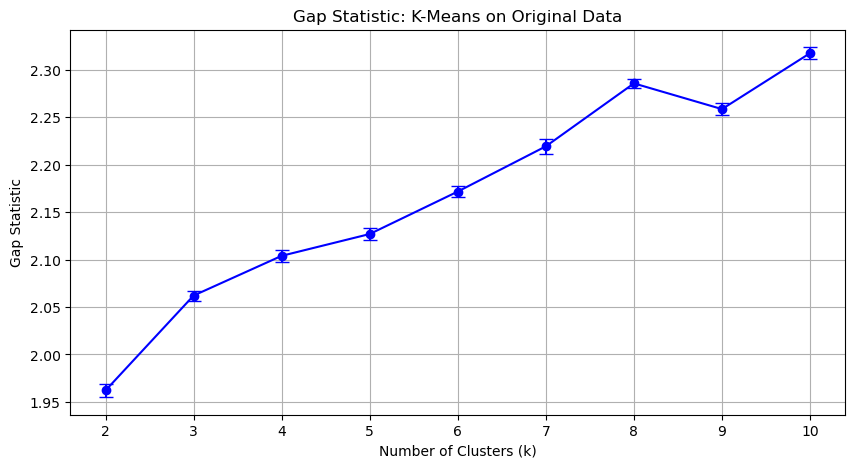


Optimal k by Gap Statistic: 8


In [ ]:
# 1.3: Gap Statistic
print("\n1.3: Gap Statistic")
print("-" * 40)


# X-> real data, k_range is the k range we are testing
# n_refs: how many random datasets to generate for comparison

def gap_statistic(X, k_range, n_refs=10, random_state=42):
    gaps = []
    stds = []

    for k in k_range:
        # Original data clustering
        _, _, inertia_orig, _, _ = k_means(X, K=k, init='kmeans++', random_state=random_state)

        # Reference datasets
        ref_inertias = []
        np.random.seed(random_state)
        # clustering n_refs different datasets
        for _ in range(n_refs):
            # Generate random reference data
            # same size as the data and the values are between min and max
            X_ref = np.random.uniform(X.min(axis=0), X.max(axis=0), size=X.shape)
            _, _, inertia_ref, _, _ = k_means(X_ref, K=k, init='kmeans++', random_state=None)
            ref_inertias.append(np.log(inertia_ref))

        # Calculate gap
        # Gap=Average(log(random inertias))−log(real inertia)
        # it should be a positive # which will then mean that the inertia of the
        # original data is correct and real structure exist which means
        # we clustered correctly
        gap = np.mean(ref_inertias) - np.log(inertia_orig)
        # standarad deviation is how different the randomly generated 10 datasets are from each other
        std = np.std(ref_inertias)
        gaps.append(gap)
        stds.append(std * np.sqrt(1 + 1/n_refs))
      # If std is small: Random datasets give similar results → Reliable measurement
      # If std is large: Random datasets give very different results → Unreliable measurement
        print(f"K={k}: Gap={gap:.4f}, Std={std:.4f}")

    return gaps, stds

gaps, stds = gap_statistic(X_scaled, k_range, n_refs=10, random_state=42)

# Plot Gap Statistic
plt.figure(figsize=(10, 5))
plt.errorbar(k_range, gaps, yerr=stds, fmt='bo-', capsize=5)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic: K-Means on Original Data')
plt.grid(True)
plt.show()

# Find optimal k using gap statistic
optimal_k_gap = k_range[0]
for i in range(len(gaps) - 1):
    if gaps[i] >= gaps[i+1] - stds[i+1]:
        optimal_k_gap = k_range[i]
        break

print(f"\nOptimal k by Gap Statistic: {optimal_k_gap}")

**Internal metric ->silhouette is above and wcss**

**Calculating Davies-Bouldin**

kmeans++: Runtime: 0.0284 seconds
kmeans++: Runtime: 0.0670 seconds
kmeans++: Runtime: 0.0554 seconds
kmeans++: Runtime: 0.0920 seconds
kmeans++: Runtime: 0.1028 seconds
kmeans++: Runtime: 0.1775 seconds
kmeans++: Runtime: 0.2559 seconds
kmeans++: Runtime: 0.3433 seconds
kmeans++: Runtime: 0.6053 seconds
Best k according to Davies-Bouldin:  9


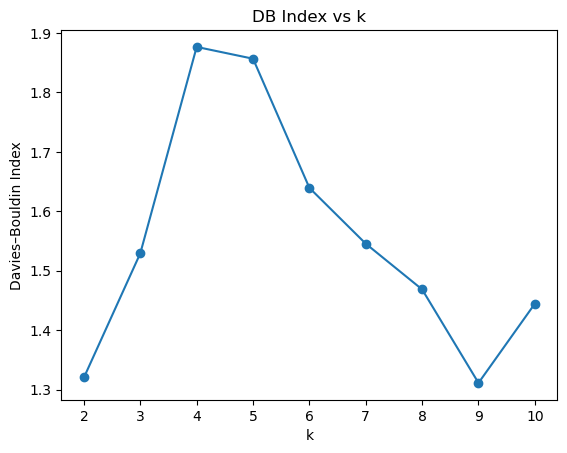

In [ ]:
db_scores = []
for k in k_range:
  labels, _, _, _, _ = k_means(X_scaled, K=k, init='kmeans++', random_state=42)
  db = davies_bouldin_index(X_scaled, labels)
  db_scores.append(db)
print("Best k according to Davies-Bouldin: ",k_range[np.argmin(db_scores)])
plt.plot(range(2,11), db_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Davies–Bouldin Index')
plt.title('DB Index vs k')
plt.show()


**Computing  Calinski–Harabasz**

kmeans++: Runtime: 0.0400 seconds
kmeans++: Runtime: 0.0860 seconds
kmeans++: Runtime: 0.1303 seconds
kmeans++: Runtime: 0.1106 seconds
kmeans++: Runtime: 0.1009 seconds
kmeans++: Runtime: 0.1755 seconds
kmeans++: Runtime: 0.2529 seconds
kmeans++: Runtime: 0.3393 seconds
kmeans++: Runtime: 0.4877 seconds
Best k according to Calinski-Harabasz:  2


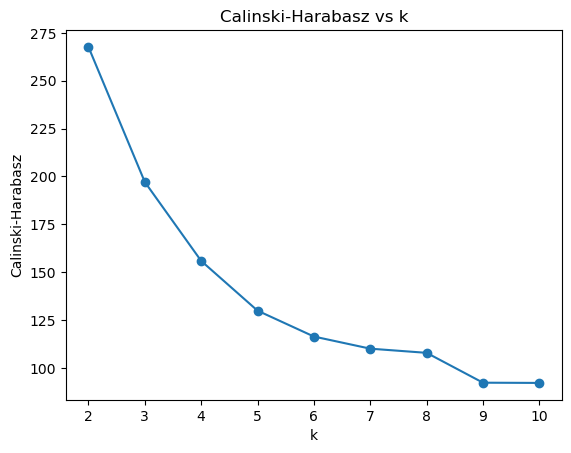

In [ ]:
c_scores = []
for k in k_range:
  labels, _, _, _, _ = k_means(X_scaled, K=k, init='kmeans++', random_state=42)
  c = calinski_harabasz_index(X_scaled, labels)
  c_scores.append(c)
print("Best k according to Calinski-Harabasz: ",k_range[np.argmax(c_scores)])
plt.plot(range(2,11), c_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz')
plt.title('Calinski-Harabasz vs k')
plt.show()


**External metrics**

**Confusion matrix**


In [ ]:
def confusion_matrix_from_clustering(y_true, cluster_labels):
    # Create confusion matrix by mapping each cluster to its most common true label.

    # labels for all points
    y_true = np.array(y_true)

    # each point belong to which cluster
    cluster_labels = np.array(cluster_labels)

    # Step 1: For each cluster, find which true class appears most often
    # dictionary with a key as the cluster number and the value to which class
    # this point actually belong to benign 0 or malignent
    cluster_to_class = {}
    for cluster_num in np.unique(cluster_labels):
        # Get all true labels for points in this cluster
        # got the labels of the points in the cluster
        true_labels_in_cluster = y_true[cluster_labels == cluster_num]
        # counting the count of each unique count (we don't want the count we want
        # the index that got the count)
        most_common = np.bincount(true_labels_in_cluster).argmax()
        cluster_to_class[cluster_num] = most_common
        # anything that falls into that cluster will be classified as the most common

    # Step 2: Convert cluster labels to predicted class labels
    # for each point in the cluster_labels (which is the np.arr that
    # have which point belongs to which cluster and map this using the
    # dictionary)
    y_pred = np.array([cluster_to_class[c] for c in cluster_labels])

    # Step 3: Build confusion matrix
    n_classes = len(np.unique(y_true))
    cm = np.zeros((n_classes, n_classes), dtype=int)

    for true_label, pred_label in zip(y_true, y_pred):
        cm[true_label, pred_label] += 1

    return cm,y_pred

Model selection (internal)

The number of clusters was selected using internal validation metrics (elbow, silhouette, Davies–Bouldin, and Calinski–Harabasz), resulting in k = 2.

External evaluation

Using the selected k, external validation metrics were computed against ground-truth labels to assess alignment with the known benign/malignant classes.

- choosen k = 2 because it we want to split our data to 2 benign and malignent and as well as silhouette and calinski has shown that 2 is the optimal k so it supports our beliefs

In [ ]:
labels,_,_,_,_ = k_means(X_scaled, K=2, init='kmeans++', random_state=42)

kmeans++: Runtime: 0.0284 seconds


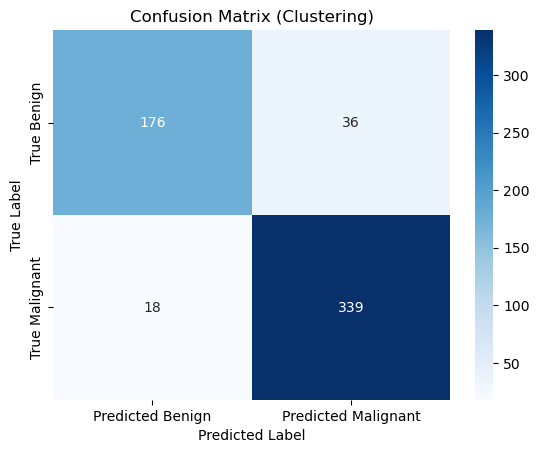

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm,y_pred = confusion_matrix_from_clustering(y, labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Benign", "Predicted Malignant"],
            yticklabels=["True Benign", "True Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Clustering)")
plt.show()


**ARI**

In [ ]:
ari = adjusted_rand_index(y,y_pred)
purity_val = purity(y,y_pred)
nmi = normalized_mutual_info(y,y_pred)
print(f" nmi: {nmi:.2f}, ari: {ari:.2f}, purity: {purity_val:.2f}")



 nmi: 0.53, ari: 0.65, purity: 0.91


**2D projection (PCA 2D) + clusters**

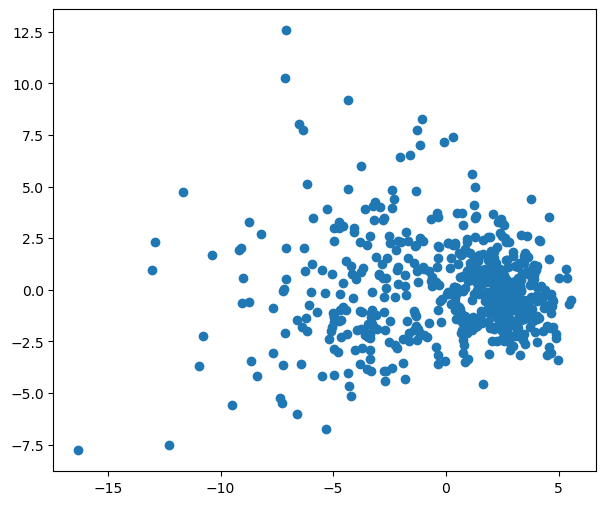

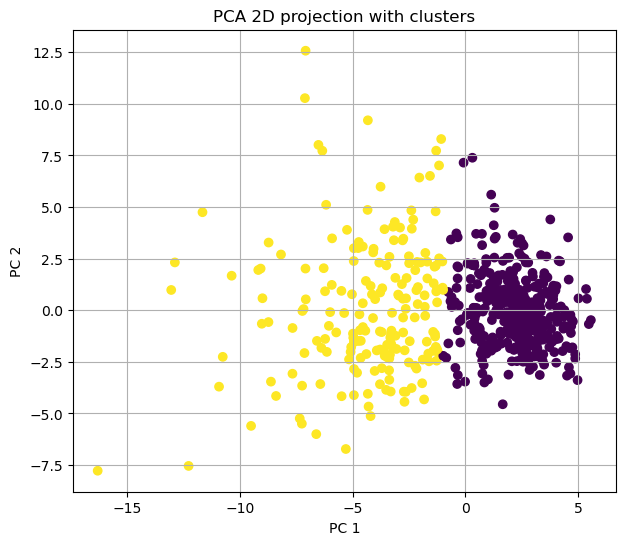

In [ ]:
# Fit PCA to 2D for visualization
pca = PCA(n_components=2)
pca.fit(X_scaled)
# transform to 2D
X_pca2 = pca.transform(X_scaled)
plt.figure(figsize=(7,6))
sc = plt.scatter(X_pca2[:,0], X_pca2[:,1])

# 3. Plot and color by cluster labels (labels from your clustering)
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
sc = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels)
plt.xlabel('PC 1'); plt.ylabel('PC 2'); plt.title('PCA 2D projection with clusters')
plt.grid(True)
plt.show()


## **Experiment 2:** GMM on original data

Log-likelihood always increases

Model becomes more complex (more parameters) for each gaussian we will have covariance matrix, mean

If we only maximize log-likelihood:
→ Best model = K = number of data points (overfitting)

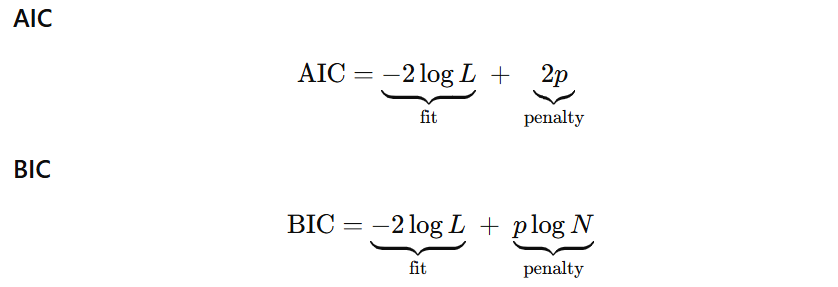


How does this work the

- higher likelihood means better so we multiplied by -2 to make it represent a loss (lower is better)


why to match up with the idea of the higher bic or aic the worse

- so when parameters increase we have penalty term that increases the aic and bic so we have the log likelihood if it was worth it (a v high increase) then it will overhead the penalty if it wasn't worth the additional parameters then this isn't good



EXPERIMENT 2: GMM on Original Data
converged at iteration 75
converged at iteration 55
converged at iteration 61
converged at iteration 38
converged at iteration 96
converged at iteration 40
converged at iteration 58
converged at iteration 45
converged at iteration 64
converged at iteration 56
converged at iteration 45
converged at iteration 84
converged at iteration 75
converged at iteration 75
converged at iteration 67
converged at iteration 12
converged at iteration 36
converged at iteration 57
converged at iteration 29
converged at iteration 52
converged at iteration 30
converged at iteration 65
converged at iteration 51
converged at iteration 16
converged at iteration 29
converged at iteration 81
converged at iteration 39
converged at iteration 72
converged at iteration 77
converged at iteration 82
converged at iteration 76


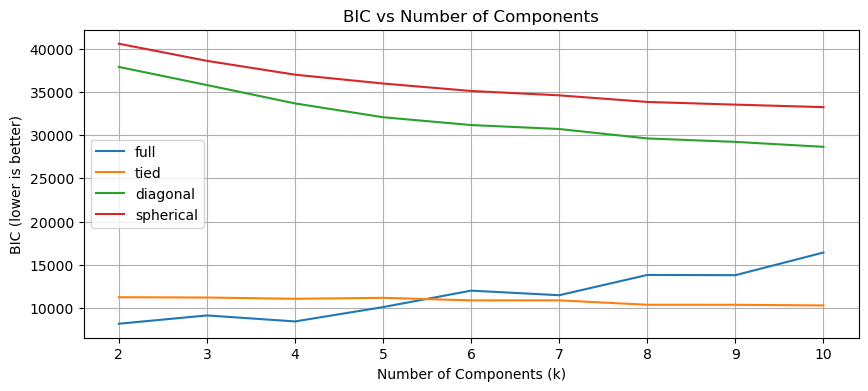

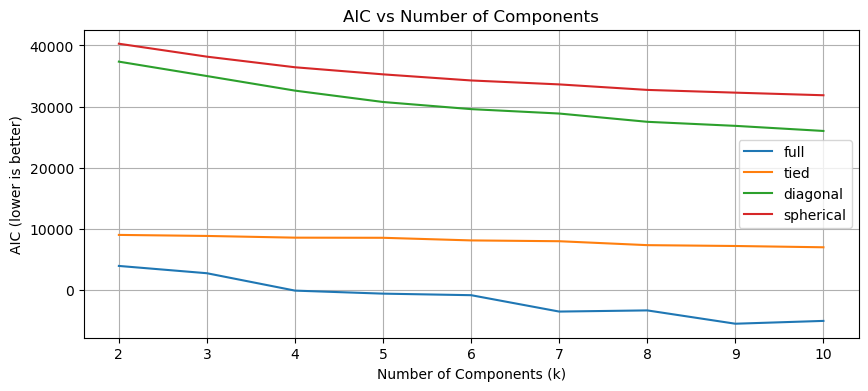


Optimal number of components (by AIC):
full: k = 9
tied: k = 10
diagonal: k = 10
spherical: k = 10

Optimal number of components (by BIC):
full: k = 2
tied: k = 10
diagonal: k = 10
spherical: k = 10
converged at iteration 45


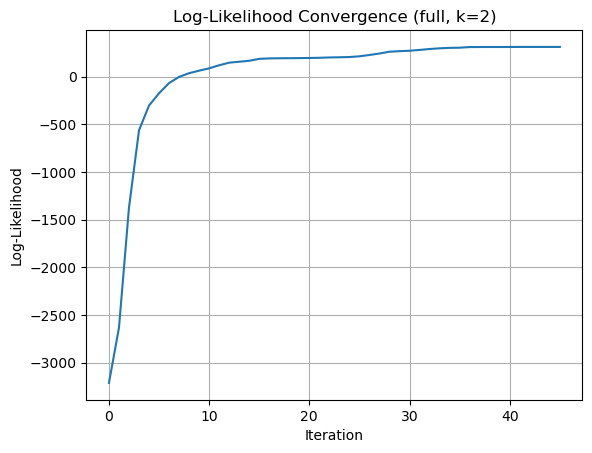

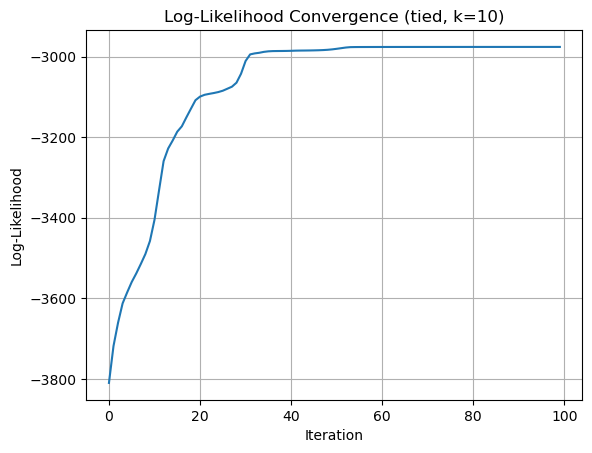

converged at iteration 76


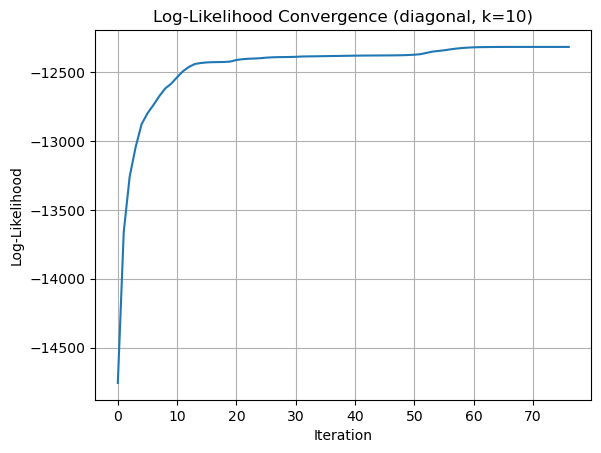

converged at iteration 68


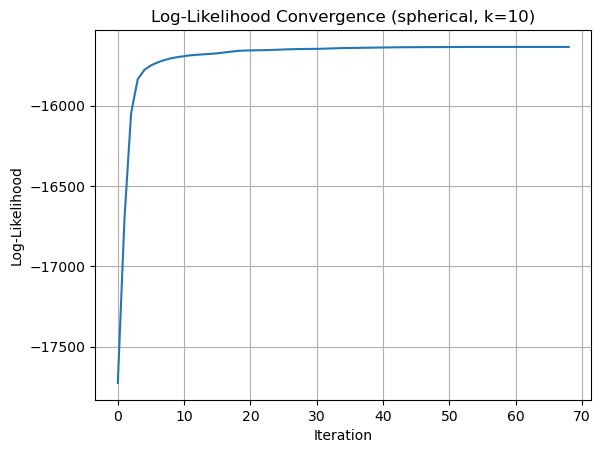

In [ ]:
print("EXPERIMENT 2: GMM on Original Data")

k_range = range(2, 11)
cov_types = ['full', 'tied', 'diagonal', 'spherical']

results = {}

# Train GMMs and compute AIC, BIC, Log-Likelihood
for cov in cov_types:
    results[cov] = {'aic': [], 'bic': [], 'll': []}

    for k in k_range:
        gmm = GMM(n_mixtures=k, covariance_type=cov,random_state=99)
        gmm.fit(X_scaled)

        ll = gmm.compute_log_likelihood(X_scaled)
        results[cov]['ll'].append(ll)
        results[cov]['aic'].append(AIC_gmm(X_scaled, gmm))
        results[cov]['bic'].append(BIC_gmm(X_scaled, gmm))

# Plot BIC
plt.figure(figsize=(10, 4))
for cov in cov_types:
    plt.plot(k_range, results[cov]['bic'], label=cov)
plt.xlabel("Number of Components (k)")
plt.ylabel("BIC (lower is better)")
plt.title("BIC vs Number of Components")
plt.legend()
plt.grid()
plt.show()

# Plot AIC
plt.figure(figsize=(10, 4))
for cov in cov_types:
    plt.plot(k_range, results[cov]['aic'], label=cov)
plt.xlabel("Number of Components (k)")
plt.ylabel("AIC (lower is better)")
plt.title("AIC vs Number of Components")
plt.legend()
plt.grid()
plt.show()


# Select optimal k using AIC
optimal_k = {}
print("\nOptimal number of components (by AIC):")
for cov in cov_types:
    best_k = k_range[np.argmin(results[cov]['aic'])]
    optimal_k[cov] = best_k
    print(f"{cov}: k = {best_k}")

# Select optimal k using BIC
optimal_k = {}
print("\nOptimal number of components (by BIC):")
for cov in cov_types:
    best_k = k_range[np.argmin(results[cov]['bic'])]
    optimal_k[cov] = best_k
    print(f"{cov}: k = {best_k}")

# Log-likelihood convergence for optimal models
for cov in cov_types:
    k = optimal_k[cov]
    gmm = GMM(n_mixtures=k, covariance_type=cov)
    gmm.fit(X_scaled)

    plt.plot(gmm.log_likelihood_history)
    plt.xlabel("Iteration")
    plt.ylabel("Log-Likelihood")
    plt.title(f"Log-Likelihood Convergence ({cov}, k={k})")
    plt.grid()
    plt.show()

results = {
    'full' : { 'aic': [aic_k2, aic_k3, ...], 'bic': [bic_k2, bic_k3, ...],
     'll': [ll_k2, ll_k3, ...] },
    'tied' : { 'aic': [...], 'bic': [...], 'll': [...] },
    'diagonal': { ... },
    'spherical': { ... }
}`

**Best K according to bic: 2**

**Covariance type: Full**

In [ ]:
gmm = GMM(n_mixtures=2, covariance_type='full',random_state=99)
gmm.fit(X_scaled)
responsibilities = gmm.responsibilities
labelsgmm = np.argmax(responsibilities, axis=1)

converged at iteration 75


Internal Clustering Metrics (GMM)
Silhouette Score           : 0.2380
Davies-Bouldin Index       : 1.7268  (lower is better)
Calinski-Harabasz Index    : 151.4018  (higher is better)

External Clustering Metrics (GMM)
Adjusted Rand Index (ARI)  : 0.5942
Normalized Mutual Info     : 0.5048
Purity                     : 0.8858


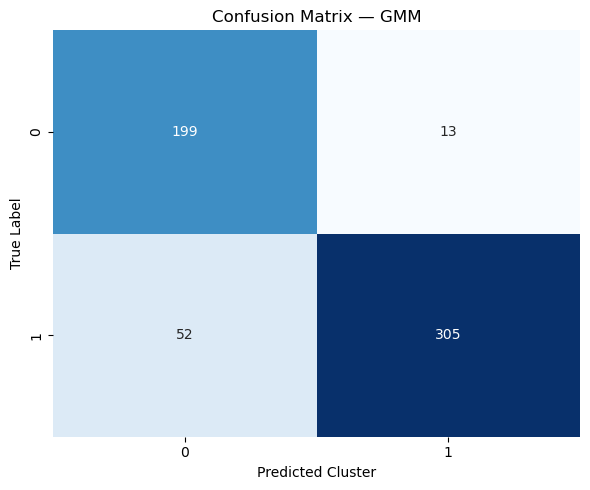

In [ ]:

sil_score = silhouette_score(X_scaled,labelsgmm)
db = davies_bouldin_index(X_scaled,labelsgmm)
ch = calinski_harabasz_index(X_scaled,labelsgmm)
# -----------------------------
cm_gmm,y_pred_gmm = confusion_matrix_from_clustering(y,labelsgmm)
ari_gmm = adjusted_rand_index(y,y_pred_gmm)
purity_gmm = purity(y,y_pred_gmm)
nmi_gmm = normalized_mutual_info(y,y_pred_gmm)
print("Internal Clustering Metrics (GMM)")
print(f"Silhouette Score           : {sil_score:.4f}")
print(f"Davies-Bouldin Index       : {db:.4f}  (lower is better)")
print(f"Calinski-Harabasz Index    : {ch:.4f}  (higher is better)")

print("\nExternal Clustering Metrics (GMM)")
print(f"Adjusted Rand Index (ARI)  : {ari_gmm:.4f}")
print(f"Normalized Mutual Info     : {nmi_gmm:.4f}")
print(f"Purity                     : {purity_gmm:.4f}")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_gmm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False
)

plt.xlabel("Predicted Cluster")
plt.ylabel("True Label")
plt.title("Confusion Matrix — GMM")
plt.tight_layout()
plt.show()




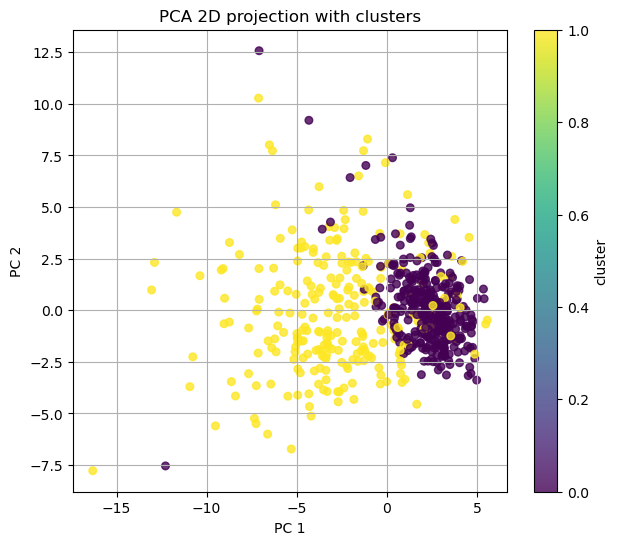

In [ ]:
# Fit PCA to 2D for visualization
pca = PCA(n_components=2)
pca.fit(X_scaled)
# transform to 2D
X_pca2 = pca.transform(X_scaled)

# 3. Plot and color by cluster labels (labels from your clustering)
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
sc = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labelsgmm, s=30, cmap='viridis', alpha=0.8)
plt.xlabel('PC 1'); plt.ylabel('PC 2'); plt.title('PCA 2D projection with clusters')
plt.colorbar(sc, label='cluster')
plt.grid(True)
plt.show()


**USED SKLEARN ONLY FOR COMPARISON!**

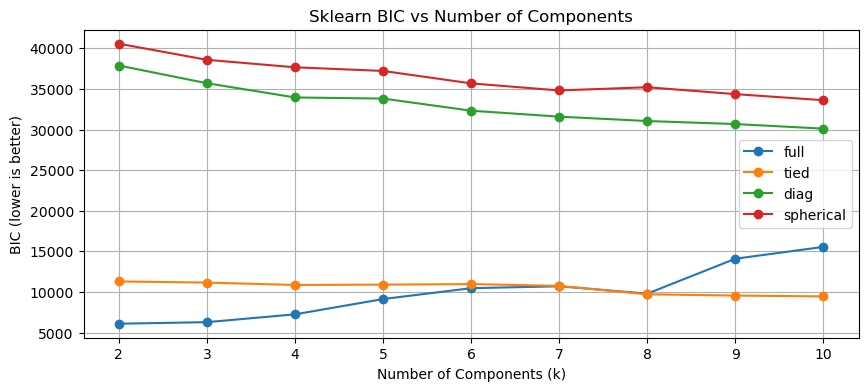

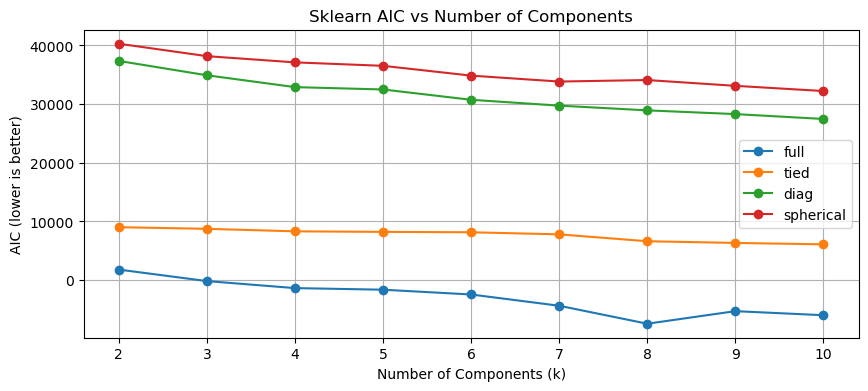


Optimal k by BIC (sklearn):
  full: k = 2
  tied: k = 10
  diag: k = 10
  spherical: k = 10

Optimal k by AIC (sklearn):
  full: k = 8
  tied: k = 10
  diag: k = 10
  spherical: k = 10


In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

k_range = range(2, 11)
cov_types = ['full', 'tied', 'diag', 'spherical']

sk_results = {}

# Train sklearn GMMs and compute AIC, BIC
for cov in cov_types:
    sk_results[cov] = {'aic': [], 'bic': []}

    for k in k_range:
        gmm = GaussianMixture(n_components=k, covariance_type=cov, max_iter=100, random_state=42)
        gmm.fit(X_scaled)

        sk_results[cov]['aic'].append(gmm.aic(X_scaled))
        sk_results[cov]['bic'].append(gmm.bic(X_scaled))

# Plot BIC
plt.figure(figsize=(10, 4))
for cov in cov_types:
    plt.plot(k_range, sk_results[cov]['bic'], label=cov, marker='o')
plt.xlabel("Number of Components (k)")
plt.ylabel("BIC (lower is better)")
plt.title("Sklearn BIC vs Number of Components")
plt.legend()
plt.grid()
plt.show()

# Plot AIC
plt.figure(figsize=(10, 4))
for cov in cov_types:
    plt.plot(k_range, sk_results[cov]['aic'], label=cov, marker='o')
plt.xlabel("Number of Components (k)")
plt.ylabel("AIC (lower is better)")
plt.title("Sklearn AIC vs Number of Components")
plt.legend()
plt.grid()
plt.show()

# Find optimal k
print("\nOptimal k by BIC (sklearn):")
for cov in cov_types:
    best_k = k_range[np.argmin(sk_results[cov]['bic'])]
    print(f"  {cov}: k = {best_k}")

print("\nOptimal k by AIC (sklearn):")
for cov in cov_types:
    best_k = k_range[np.argmin(sk_results[cov]['aic'])]
    print(f"  {cov}: k = {best_k}")

## **Experiment 3: K-Means after PCA**

### K-Means++ Initialization

In [ ]:
n_components = [2, 5, 10, 15, 20]
results_kpp = []

for n in n_components:
    # PCA
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)

    # Reconstruction error
    recon_error = pca.reconstruction_error(X_scaled)

    # K-Means on PCA space
    labels, centroids, final_inertia, inertia_history, n_iters = k_means(
        X_pca,
        K=3,
        init='kmeans++',
        tolerance=1e-4,
        random_state=42
    )

    results_kpp.append({
        "PCA Components": n,
        "Explained Variance (%)": np.sum(pca.explained_variance_ratio) * 100,
        "Reconstruction Error (MSE)": recon_error,
        "K-Means Inertia": final_inertia,
        "Iterations": n_iters + 1
    })


kmeans++: Runtime: 0.0822 seconds
kmeans++: Runtime: 0.1181 seconds
kmeans++: Runtime: 0.1251 seconds
kmeans++: Runtime: 0.1060 seconds
kmeans++: Runtime: 0.1577 seconds


### K-Means Random Initialization

In [ ]:
n_components = [2, 5, 10, 15, 20]
results_random = []

for n in n_components:
    # PCA
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)

    # Reconstruction error
    recon_error = pca.reconstruction_error(X_scaled)

    # K-Means on PCA space
    labels, centroids, final_inertia, inertia_history, n_iters = k_means(
        X_pca,
        K=3,
        init='random',
        tolerance=1e-4,
        random_state=42
    )

    results_random.append({
        "PCA Components": n,
        "Explained Variance (%)": np.sum(pca.explained_variance_ratio) * 100,
        "Reconstruction Error (MSE)": recon_error,
        "K-Means Inertia": final_inertia,
        "Iterations": n_iters + 1
    })


random: Runtime: 0.1377 seconds
random: Runtime: 0.0919 seconds
random: Runtime: 0.1292 seconds
random: Runtime: 0.0938 seconds
random: Runtime: 0.0842 seconds


### Trade-off between Dimensionality and Clustering Quality

In [ ]:
import pandas as pd

df_kpp = pd.DataFrame(results_kpp)
df_random = pd.DataFrame(results_random)

display(
    df_kpp.style.set_caption("K-Means++ Initialization")
                .format({
                    "Explained Variance (%)": "{:.2f}",
                    "Reconstruction Error (MSE)": "{:.4f}",
                    "K-Means Inertia": "{:.2f}"
                }),
    df_random.style.set_caption("Random Initialization")
                   .format({
                       "Explained Variance (%)": "{:.2f}",
                       "Reconstruction Error (MSE)": "{:.4f}",
                       "K-Means Inertia": "{:.2f}"
                   })
)


- **Effect of increasing PCA components on Explained Variance and Reconstruction Error and K-Means Inertia**
    - Explained Variance increases with more components, while Reconstruction Error decreases, showing a trade-off between dimensionality and data fidelity.
    - Kmeans inertia increases with more PCA components, indicating improved clustering quality as more information is retained.
- **Reconstruction error vs clustering performance**
    - As reconstruction error decreases (better data representation), K-means inertia also decreases, indicating improved clustering performance with better data fidelity.

## **Experiment 4: GMM after PCA**

In [ ]:
import pandas as pd
import numpy as np

results_gmm = []
n_components = [2, 5, 10, 15, 20]

for n in n_components:
    gmm = GMM(n_mixtures=n, covariance_type='full', max_iter=100, tolerance=1e-4)
    gmm.fit(X_scaled)

    results_gmm.append({
        "Components": n,
        "Final Log-Likelihood": gmm.log_likelihood_history[-1],
        "Min Prior": np.min(gmm.prior),
        "Max Prior": np.max(gmm.prior),
        "Iterations": len(gmm.log_likelihood_history)
    })



converged at iteration 56
converged at iteration 53
converged at iteration 15
converged at iteration 23
converged at iteration 16


In [ ]:
df = pd.DataFrame(results_gmm)
display(
    df.style.set_caption("GMM after PCA").hide(axis="index").format({
        "Final Log-Likelihood": "{:.2f}",
        "Min Prior": "{:.4f}",
        "Max Prior": "{:.4f}"
    })
)

# Experiment 3

### K-Means++ Initialization

In [ ]:
n_components = [2, 5, 10, 15, 20]
results_kpp = []

optimal_k = 2

for n in n_components:
    # PCA
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)

    # Reconstruction error
    recon_error = pca.reconstruction_error(X_scaled)

    # K-Means on PCA space
    labels, centroids, final_inertia, inertia_history, n_iters = k_means(
        X_pca,
        K=optimal_k,
        init='kmeans++',
        tolerance=1e-4,
        random_state=42
    )

    # Internal validation metrics
    sil = silhouette_score(X_pca, labels)
    db = davies_bouldin_index(X_pca, labels)
    ch = calinski_harabasz_index(X_pca, labels)
    wcss = within_cluster_sum_of_squares(X_pca, labels, centroids)

    # External validation metrics
    ari = adjusted_rand_index(y, labels)
    nmi = normalized_mutual_info(y, labels)
    pur = purity(y, labels)
    cm = confusion_matrix_from_clustering(y, labels)


    results_kpp.append({
        "PCA Components": n,
        "Explained Variance (%)": np.sum(pca.explained_variance_ratio) * 100,
        "Reconstruction Error (MSE)": recon_error,
        "K-Means Inertia": final_inertia,
        "Iterations": n_iters + 1,
        "Silhouette Score": sil,
        "Davies-Bouldin Index": db,
        "Calinski-Harabasz Index": ch,
        "WCSS": wcss,
        "Adjusted Rand Index": ari,
        "Normalized Mutual Information": nmi,
        "Purity": pur,
        "Confusion Matrix": cm
    })


kmeans++: Runtime: 0.0606 seconds
kmeans++: Runtime: 0.0517 seconds
kmeans++: Runtime: 0.0277 seconds
kmeans++: Runtime: 0.0328 seconds
kmeans++: Runtime: 0.0419 seconds


### K-Means Random Initialization

In [ ]:
n_components = [2, 5, 10, 15, 20]
results_random = []

for n in n_components:
    # PCA
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)

    # Reconstruction error
    recon_error = pca.reconstruction_error(X_scaled)

    # K-Means on PCA space
    labels, centroids, final_inertia, inertia_history, n_iters = k_means(
        X_pca,
        K=optimal_k,
        init='random',
        tolerance=1e-4,
        random_state=42
    )

    # Internal validation metrics
    sil = silhouette_score(X_pca, labels)
    db = davies_bouldin_index(X_pca, labels)
    ch = calinski_harabasz_index(X_pca, labels)
    wcss = within_cluster_sum_of_squares(X_pca, labels, centroids)

    # External validation metrics
    ari = adjusted_rand_index(y, labels)
    nmi = normalized_mutual_info(y, labels)
    pur = purity(y, labels)
    cm = confusion_matrix_from_clustering(y, labels)

    results_random.append({
        "PCA Components": n,
        "Explained Variance (%)": np.sum(pca.explained_variance_ratio) * 100,
        "Reconstruction Error (MSE)": recon_error,
        "K-Means Inertia": final_inertia,
        "Iterations": n_iters + 1,
        "Silhouette Score": sil,
        "Davies-Bouldin Index": db,
        "Calinski-Harabasz Index": ch,
        "WCSS": wcss,
        "Adjusted Rand Index": ari,
        "Normalized Mutual Information": nmi,
        "Purity": pur,
        "Confusion Matrix": cm
    })


random: Runtime: 0.0866 seconds
random: Runtime: 0.0560 seconds
random: Runtime: 0.0680 seconds
random: Runtime: 0.0503 seconds
random: Runtime: 0.0733 seconds


In [ ]:
import pandas as pd

df_kpp = pd.DataFrame(results_kpp)
df_random = pd.DataFrame(results_random)

display(
    df_kpp.style.set_caption("K-Means++ Initialization").hide(axis="index").hide(subset=["Confusion Matrix"], axis=1)
                .format({
                    "Explained Variance (%)": "{:.2f}",
                    "Reconstruction Error (MSE)": "{:.4f}",
                    "K-Means Inertia": "{:.2f}",
                    "Silhouette Score": "{:.4f}",
                    "Davies-Bouldin Index": "{:.4f}",
                    "Calinski-Harabasz Index": "{:.2f}",
                    "WCSS": "{:.2f}",
                    "Adjusted Rand Index": "{:.4f}",
                    "Normalized Mutual Information": "{:.4f}",
                    "Purity": "{:.4f}"
                }),
    df_random.style.set_caption("Random Initialization").hide(axis="index").hide(subset=["Confusion Matrix"], axis=1)
                   .format({
                       "Explained Variance (%)": "{:.2f}",
                       "Reconstruction Error (MSE)": "{:.4f}",
                       "K-Means Inertia": "{:.2f}",
                       "Silhouette Score": "{:.4f}",
                       "Davies-Bouldin Index": "{:.4f}",
                       "Calinski-Harabasz Index": "{:.2f}",
                       "WCSS": "{:.2f}",
                       "Adjusted Rand Index": "{:.4f}",
                       "Normalized Mutual Information": "{:.4f}",
                       "Purity": "{:.4f}"
                   })
)


<class 'numpy.ndarray'>


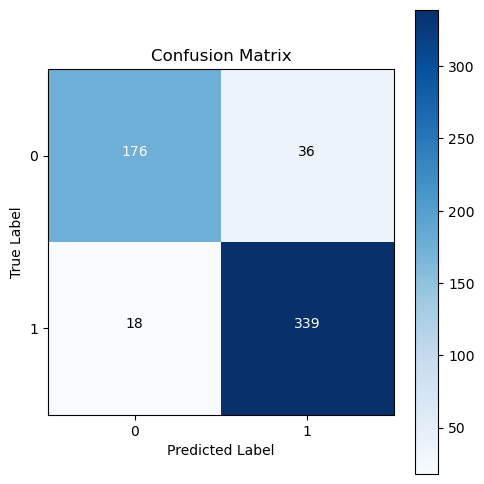

In [ ]:
df_10 = df_kpp[df_kpp["PCA Components"] == 10].iloc[0]
cm, _ = df_10["Confusion Matrix"]
print(type(cm))       # should be numpy.ndarray

classes = np.unique(y)

plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Show numbers inside cells
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

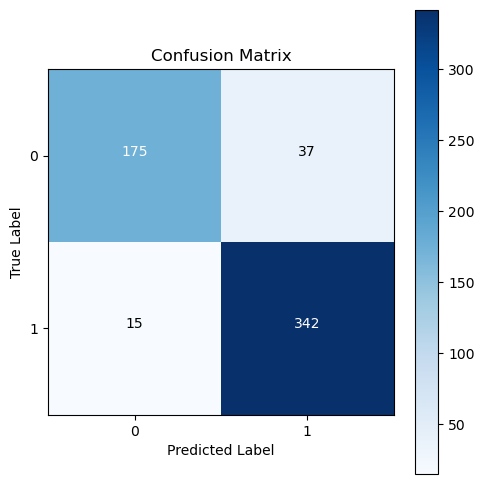

In [ ]:
df_10 = df_random[df_random["PCA Components"] == 10].iloc[0]
cm, _ = df_10["Confusion Matrix"]
classes = np.unique(y)

plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Show numbers inside cells
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

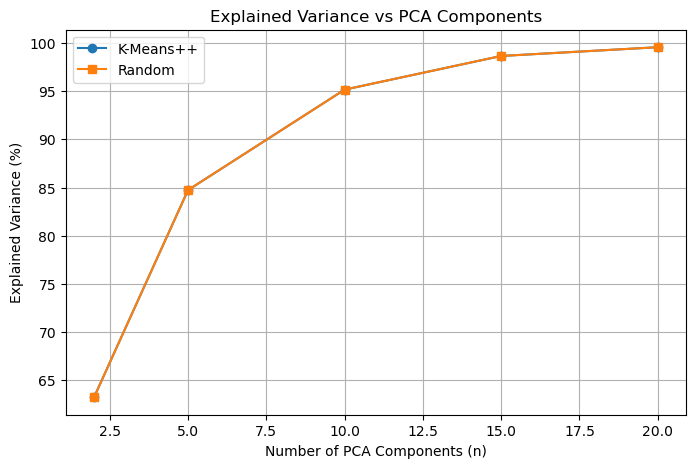

In [ ]:
# Explained Variance Plot

plt.figure(figsize=(8, 5))
plt.plot(df_kpp["PCA Components"], df_kpp["Explained Variance (%)"], marker='o', label="K-Means++")
plt.plot(df_random["PCA Components"], df_random["Explained Variance (%)"], marker='s', label="Random")
plt.xlabel("Number of PCA Components (n)")
plt.ylabel("Explained Variance (%)")
plt.title("Explained Variance vs PCA Components")

plt.legend()
plt.grid(True)
plt.show()


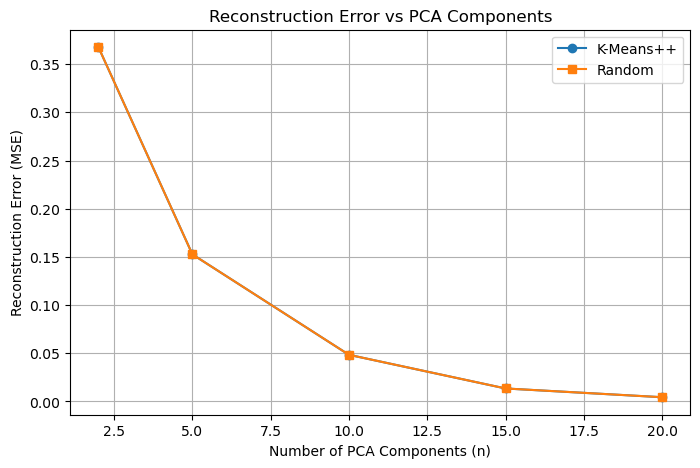

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(df_kpp["PCA Components"], df_kpp["Reconstruction Error (MSE)"], marker='o', label="K-Means++")
plt.plot(df_random["PCA Components"], df_random["Reconstruction Error (MSE)"], marker='s', label="Random")
plt.xlabel("Number of PCA Components (n)")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("Reconstruction Error vs PCA Components")

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
metrics_to_plot = ["Silhouette", "Davies-Bouldin", "Calinski-Harabasz", "ARI", "NMI", "Purity", "AIC", "BIC"]

for metric in metrics_to_plot:
    pivot = df_kpp.pivot(index='Covariance', columns='PCA Components', values=metric)

    plt.figure(figsize=(12, 5))

    if metric in ["Davies-Bouldin", "AIC", "BIC"]:
        cmap = 'RdYlGn_r'
    else:
        cmap = 'viridis'

    im = plt.imshow(pivot.values, cmap=cmap, aspect='auto')

    # Colorbar
    cbar = plt.colorbar(im)
    cbar.set_label(f'{metric} {"(Higher is Better)" if metric not in ["Davies-Bouldin", "AIC", "BIC"] else "(Lower is Better)"}', fontsize=12)

    # Tick labels
    plt.xticks(range(len(pivot.columns)), pivot.columns)
    plt.yticks(range(len(pivot.index)), pivot.index)

    # Labels and title
    plt.xlabel('Number of PCA Components', fontsize=12)
    plt.ylabel('GMM Covariance Type', fontsize=12)
    plt.title(f'{metric} Heatmap: PCA Dim vs Covariance', fontsize=14, fontweight='bold')

    for i in range(len(pivot.index)):
        for j in range(len(pivot.columns)):
            val = pivot.values[i, j]
            if metric in ["Davies-Bouldin", "AIC", "BIC"]:
                color = "white" if val > np.max(pivot.values)/2 else "black"
            else:
                color = "white" if val < np.max(pivot.values)/2 else "black"
            plt.text(j, i, f'{val:.3f}', ha="center", va="center", color=color)

    plt.tight_layout()
    plt.show()


KeyError: 'Covariance'

- **Effect of increasing PCA components on Explained Variance and Reconstruction Error and K-Means Inertia**
    - Explained Variance increases with more components, while Reconstruction Error decreases, showing a trade-off between dimensionality and data fidelity.
    - Kmeans inertia increases with more PCA components, indicating improved clustering quality as more information is retained.
- **Reconstruction error vs clustering performance**
    - As reconstruction error decreases (better data representation), K-means inertia also decreases, indicating improved clustering performance with better data fidelity.

# Experiment 4

In [ ]:
import pandas as pd
import numpy as np

n_components = [2, 5, 10, 15, 20]

best_n_mixtures = 2
results_gmm = []

for n in n_components:

    # PCA
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)

    for cov_type in ['full', 'tied', 'diagonal', 'spherical']:

        gmm = GMM(n_mixtures=best_n_mixtures,
                  covariance_type=cov_type,
                  max_iter=100,
                  tolerance=1e-4)

        gmm.fit(X_pca)

        # Get cluster labels from GMM responsibilities
        R = gmm.responsibilities
        labels = np.argmax(R, axis=1) # assign each point to the cluster with highest responsibility


        # Internal metrics
        sil = silhouette_score(X_pca, labels)
        db  = davies_bouldin_index(X_pca, labels)
        ch  = calinski_harabasz_index(X_pca, labels)
        wcss = within_cluster_sum_of_squares(X_pca, labels, gmm.means)


        # External metrics
        ari = adjusted_rand_index(y, labels)
        nmi = normalized_mutual_info(y, labels)
        pur = purity(y, labels)

        bic = BIC_gmm(X_pca, gmm)
        aic = AIC_gmm(X_pca, gmm)
        ll  = log_likelihood_gmm(X_pca, gmm)
        cm = confusion_matrix_from_clustering(y, labels)

        results_gmm.append({
            "PCA Components": n,
            "Covariance": cov_type,
            "Log-Likelihood": ll,
            "AIC": aic,
            "BIC": bic,
            "Silhouette": sil,
            "Davies-Bouldin": db,
            "Calinski-Harabasz": ch,
            "ARI": ari,
            "NMI": nmi,
            "Purity": pur,
            "Iterations": len(gmm.log_likelihood_history),
            "Confusion Matrix": cm
        })



converged at iteration 30
converged at iteration 51
converged at iteration 38
converged at iteration 23
converged at iteration 30
converged at iteration 52
converged at iteration 36
converged at iteration 20
converged at iteration 30
converged at iteration 29
converged at iteration 18
converged at iteration 21
converged at iteration 26
converged at iteration 20
converged at iteration 17
converged at iteration 67
converged at iteration 18
converged at iteration 35
converged at iteration 20


In [ ]:
df = pd.DataFrame(results_gmm)

styled = (
    df.style
      .set_caption("GMM after PCA")
      .hide(axis="index")
      .hide(subset=["Confusion Matrix"], axis=1)
      .format({
          "Final Log-Likelihood": "{:.2f}",
          "Min Prior": "{:.4f}",
          "Max Prior": "{:.4f}",
          "Silhouette": "{:.4f}",
          "Davies-Bouldin": "{:.4f}",
          "Calinski-Harabasz": "{:.2f}",
          "ARI": "{:.4f}",
          "NMI": "{:.4f}",
          "Purity": "{:.4f}"
      })
)

display(styled)


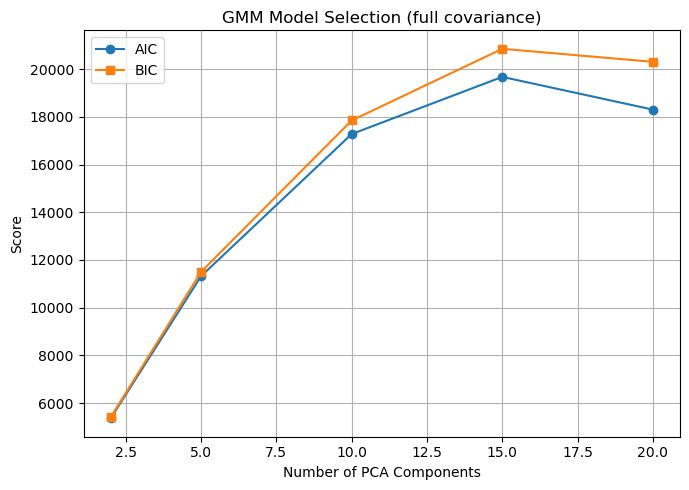

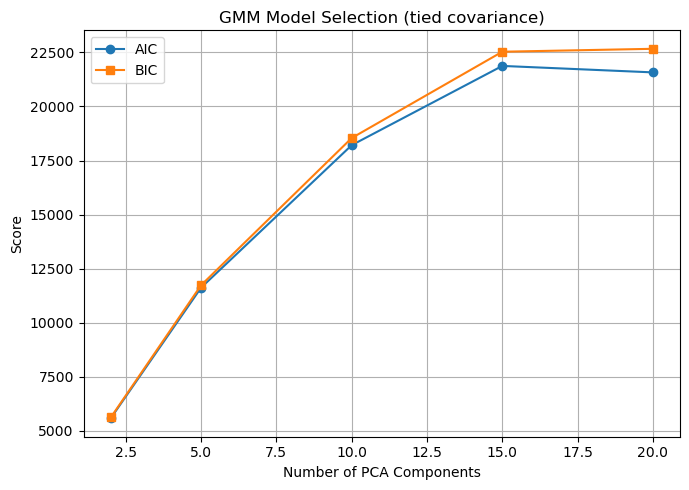

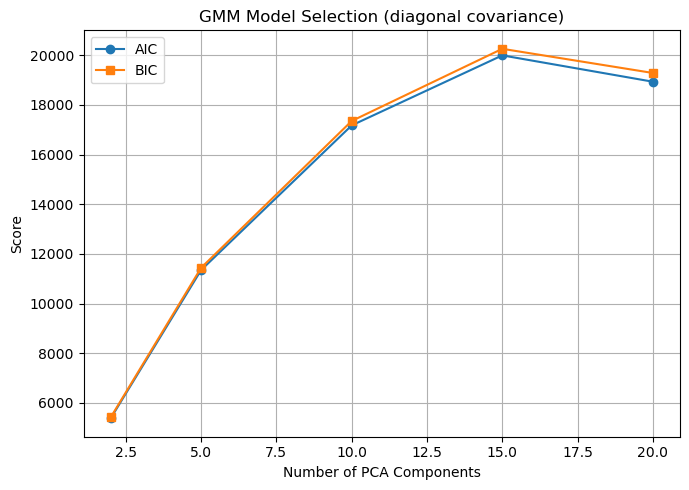

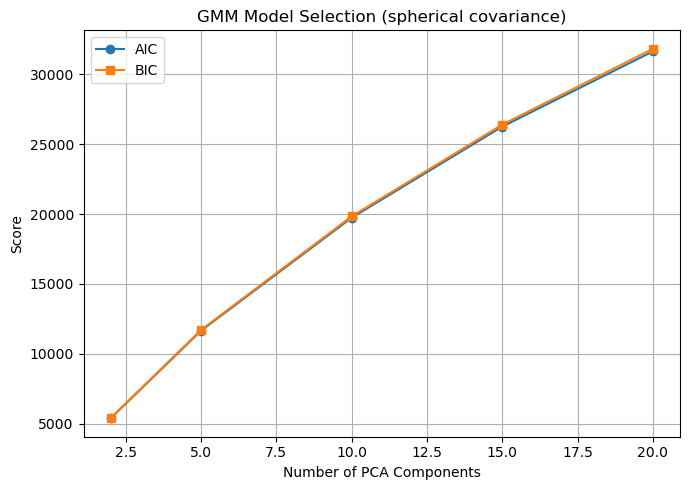

In [ ]:
# AIC and BIC vs PCA Components for each covariance type Plot

cov_types = df["Covariance"].unique()

for cov in cov_types:
    df_cov = df[df["Covariance"] == cov]

    plt.figure(figsize=(7,5))
    plt.plot(
        df_cov["PCA Components"],
        df_cov["AIC"],
        marker='o',
        label="AIC"
    )
    plt.plot(
        df_cov["PCA Components"],
        df_cov["BIC"],
        marker='s',
        label="BIC"
    )

    plt.xlabel("Number of PCA Components")
    plt.ylabel("Score")
    plt.title(f"GMM Model Selection ({cov} covariance)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


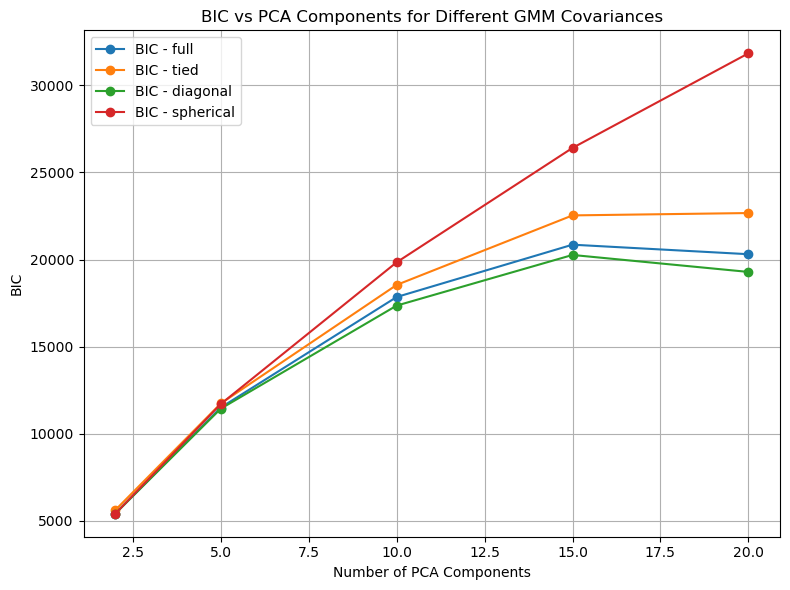

In [ ]:
plt.figure(figsize=(8,6))

for cov in cov_types:
    df_cov = df[df["Covariance"] == cov]
    plt.plot(
        df_cov["PCA Components"],
        df_cov["BIC"],
        marker='o',
        label=f"BIC - {cov}"
    )

plt.xlabel("Number of PCA Components")
plt.ylabel("BIC")
plt.title("BIC vs PCA Components for Different GMM Covariances")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


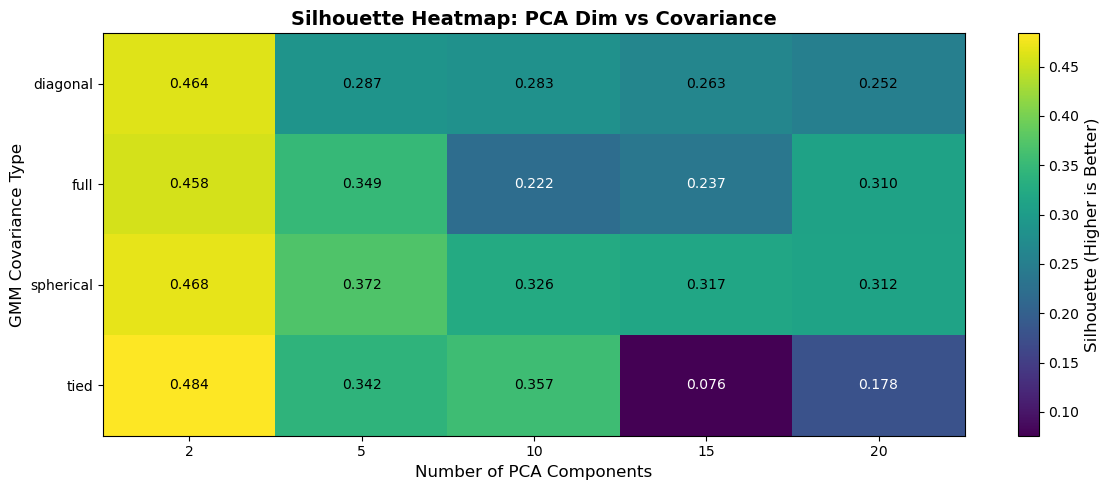

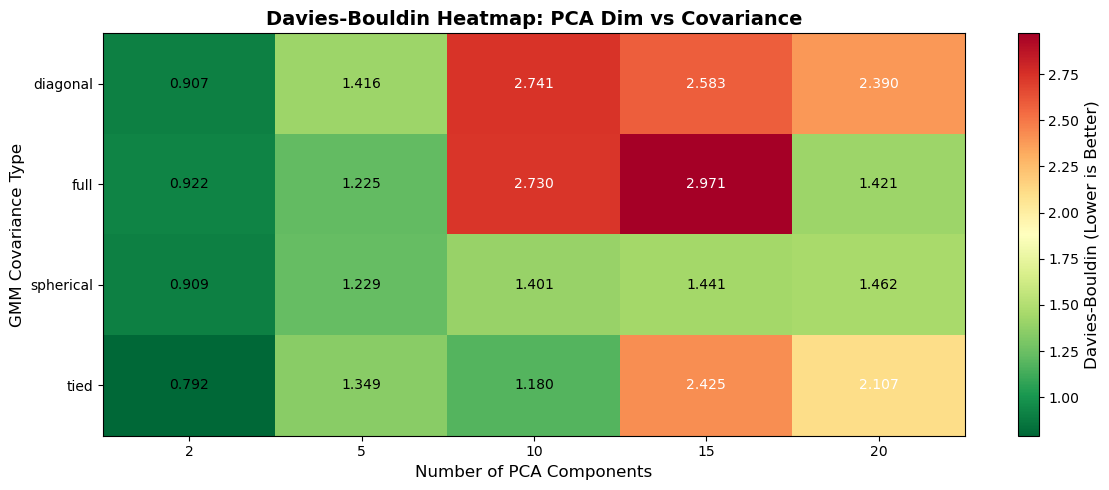

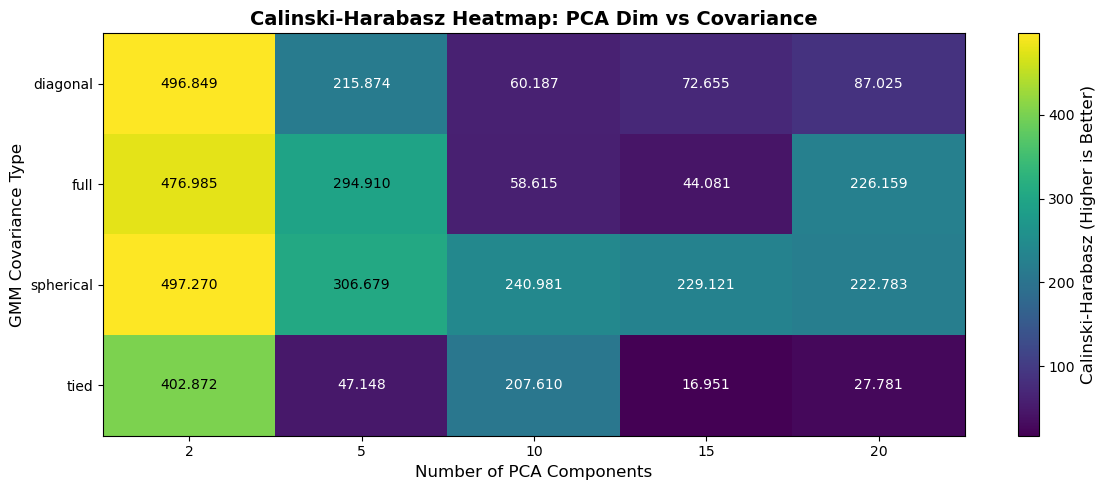

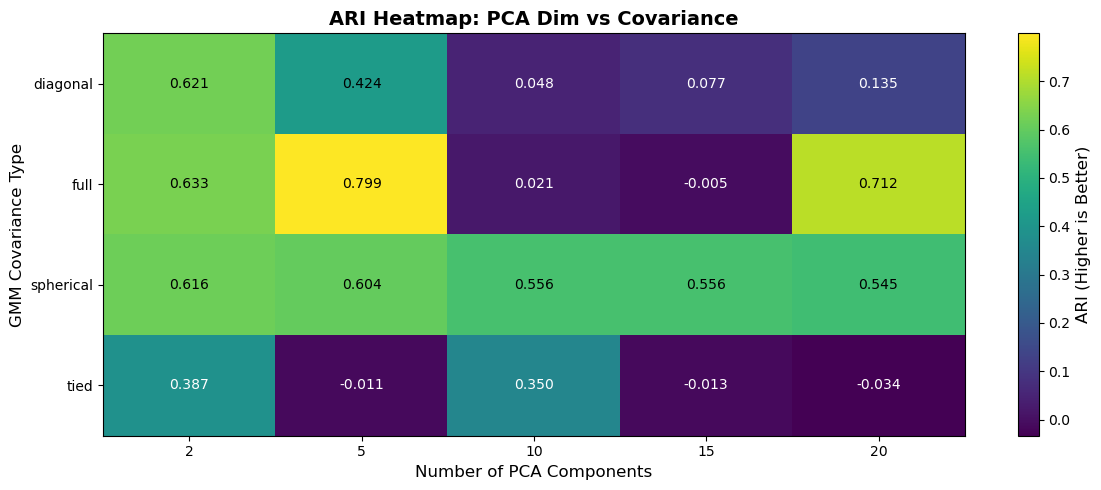

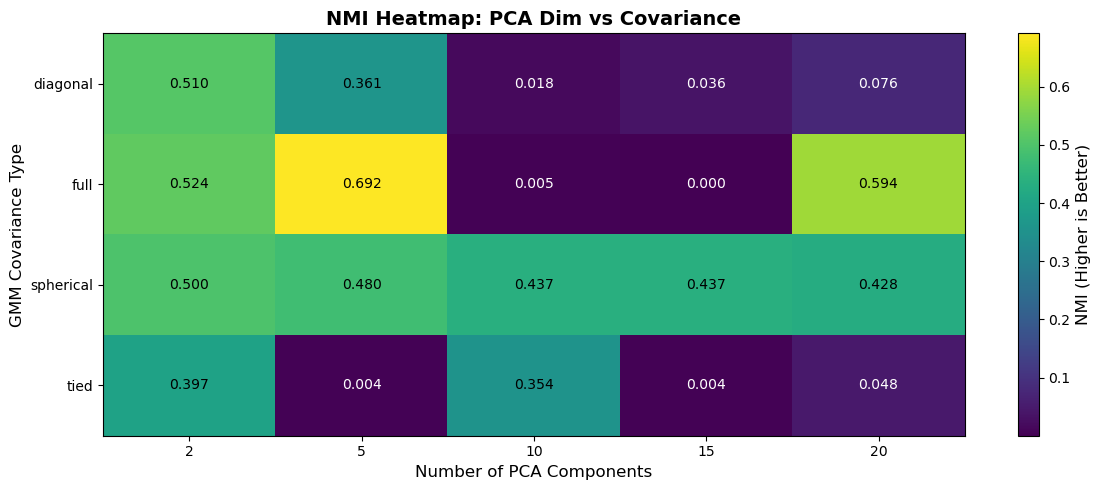

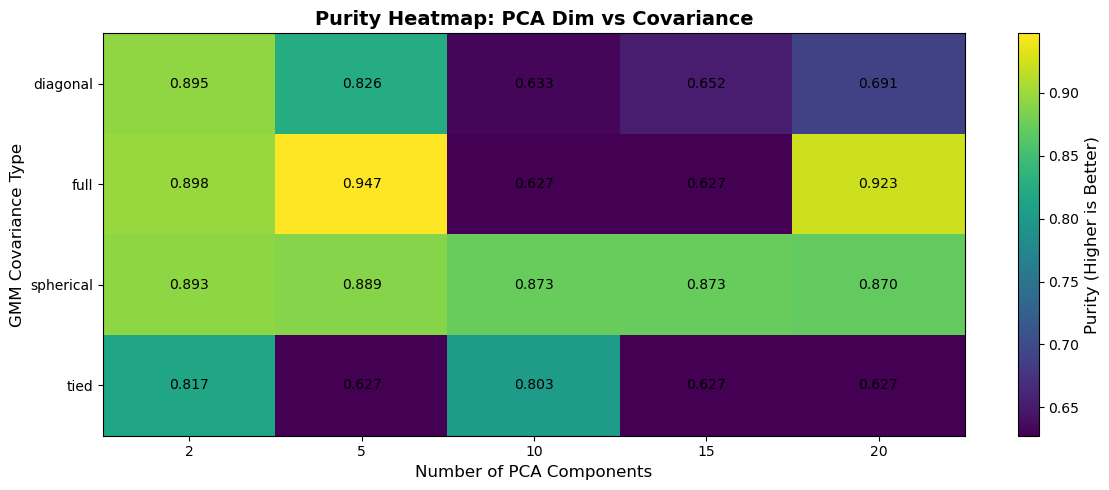

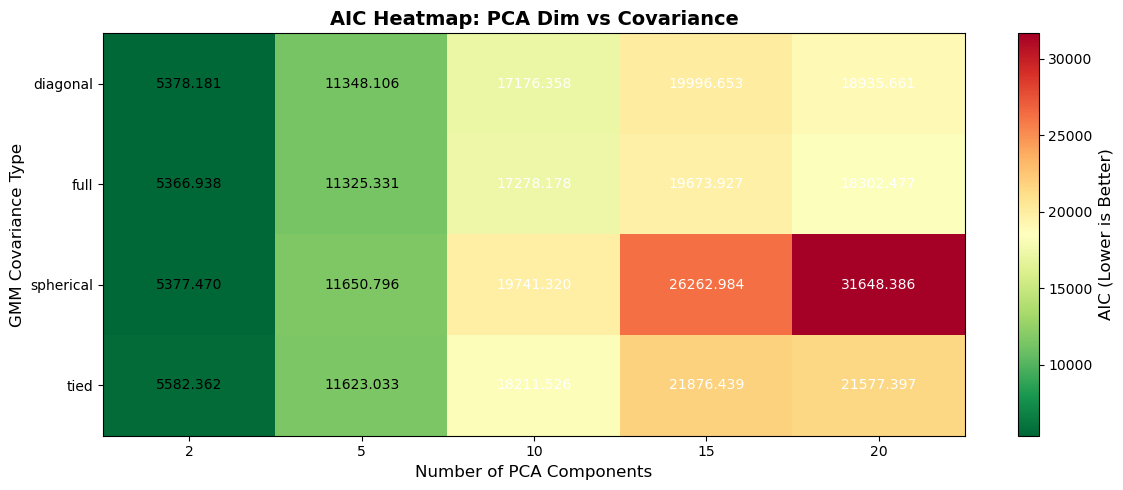

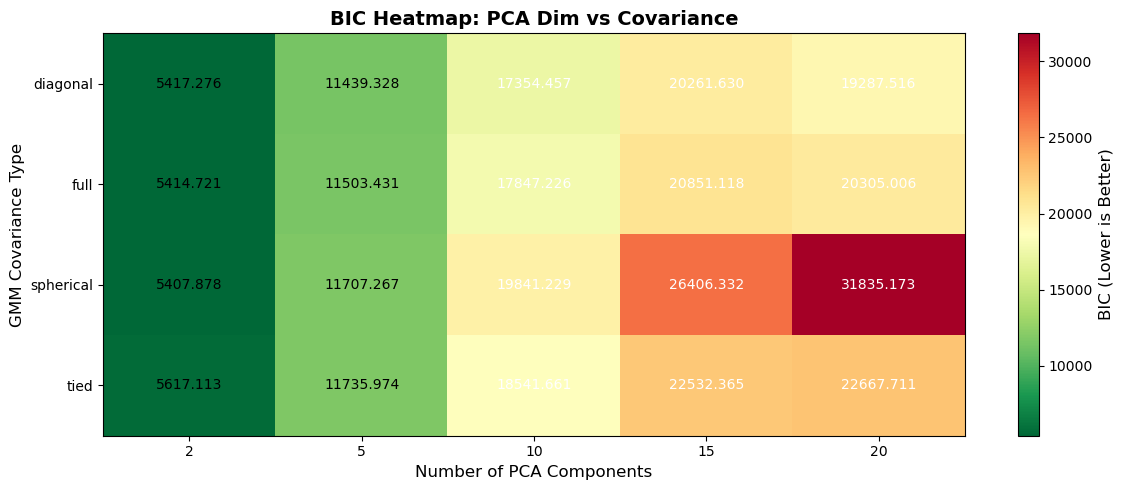

In [ ]:
metrics_to_plot = ["Silhouette", "Davies-Bouldin", "Calinski-Harabasz", "ARI", "NMI", "Purity", "AIC", "BIC"]

for metric in metrics_to_plot:
    pivot = df.pivot(index='Covariance', columns='PCA Components', values=metric)

    plt.figure(figsize=(12, 5))

    if metric in ["Davies-Bouldin", "AIC", "BIC"]:
        cmap = 'RdYlGn_r'
    else:
        cmap = 'viridis'

    im = plt.imshow(pivot.values, cmap=cmap, aspect='auto')

    # Colorbar
    cbar = plt.colorbar(im)
    cbar.set_label(f'{metric} {"(Higher is Better)" if metric not in ["Davies-Bouldin", "AIC", "BIC"] else "(Lower is Better)"}', fontsize=12)

    # Tick labels
    plt.xticks(range(len(pivot.columns)), pivot.columns)
    plt.yticks(range(len(pivot.index)), pivot.index)

    # Labels and title
    plt.xlabel('Number of PCA Components', fontsize=12)
    plt.ylabel('GMM Covariance Type', fontsize=12)
    plt.title(f'{metric} Heatmap: PCA Dim vs Covariance', fontsize=14, fontweight='bold')

    for i in range(len(pivot.index)):
        for j in range(len(pivot.columns)):
            val = pivot.values[i, j]
            if metric in ["Davies-Bouldin", "AIC", "BIC"]:
                color = "white" if val > np.max(pivot.values)/2 else "black"
            else:
                color = "white" if val < np.max(pivot.values)/2 else "black"
            plt.text(j, i, f'{val:.3f}', ha="center", va="center", color=color)

    plt.tight_layout()
    plt.show()


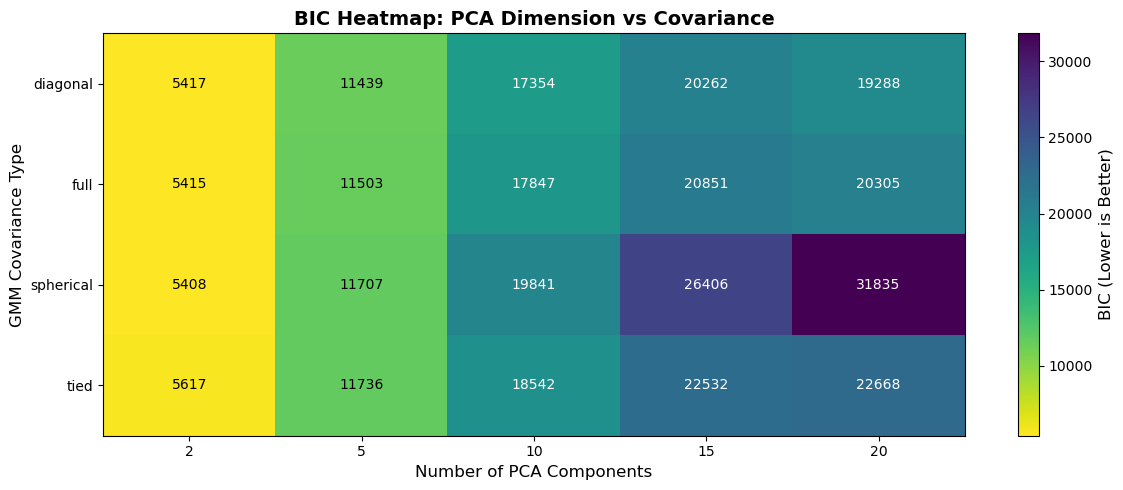

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pivot_bic = df.pivot(index='Covariance', columns='PCA Components', values='BIC')

plt.figure(figsize=(12, 5))
im = plt.imshow(pivot_bic.values, cmap='viridis_r', aspect='auto')

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label('BIC (Lower is Better)', fontsize=12)

# Tick labels
plt.xticks(range(len(pivot_bic.columns)), pivot_bic.columns)
plt.yticks(range(len(pivot_bic.index)), pivot_bic.index)

plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('GMM Covariance Type', fontsize=12)
plt.title('BIC Heatmap: PCA Dimension vs Covariance', fontsize=14, fontweight='bold')

# Annotate each cell
for i in range(len(pivot_bic.index)):
    for j in range(len(pivot_bic.columns)):
        val = pivot_bic.values[i, j]
        color = "white" if val > np.max(pivot_bic.values)/2 else "black"
        plt.text(j, i, f'{val:.0f}', ha="center", va="center", color=color)

plt.tight_layout()
plt.show()


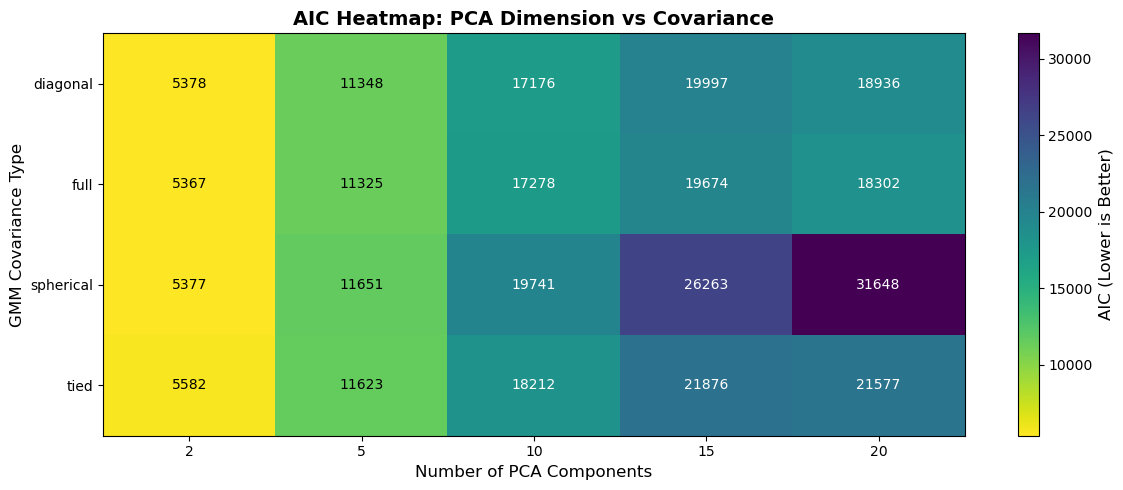

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pivot_aic = df.pivot(index='Covariance', columns='PCA Components', values='AIC')

plt.figure(figsize=(12, 5))
im = plt.imshow(pivot_aic.values, cmap='viridis_r', aspect='auto')

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label('AIC (Lower is Better)', fontsize=12)

# Tick labels
plt.xticks(range(len(pivot_bic.columns)), pivot_bic.columns)
plt.yticks(range(len(pivot_bic.index)), pivot_bic.index)

plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('GMM Covariance Type', fontsize=12)
plt.title('AIC Heatmap: PCA Dimension vs Covariance', fontsize=14, fontweight='bold')

# Annotate each cell
for i in range(len(pivot_bic.index)):
    for j in range(len(pivot_aic.columns)):
        val = pivot_aic.values[i, j]
        color = "white" if val > np.max(pivot_aic.values)/2 else "black"
        plt.text(j, i, f'{val:.0f}', ha="center", va="center", color=color)

plt.tight_layout()
plt.show()


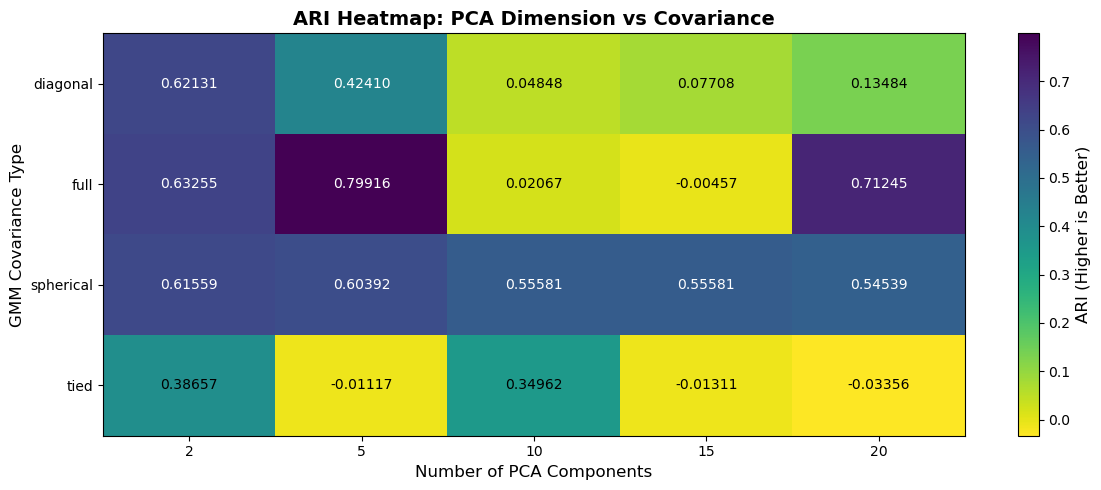

In [ ]:
pivot_ari = df.pivot(index='Covariance', columns='PCA Components', values='ARI')

plt.figure(figsize=(12, 5))
im = plt.imshow(pivot_ari.values, cmap='viridis_r', aspect='auto')

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label('ARI (Higher is Better)', fontsize=12)
# Tick labels
plt.xticks(range(len(pivot_ari.columns)), pivot_ari.columns)
plt.yticks(range(len(pivot_ari.index)), pivot_ari.index)

plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('GMM Covariance Type', fontsize=12)
plt.title('ARI Heatmap: PCA Dimension vs Covariance', fontsize=14, fontweight='bold')
# Annotate each cell
for i in range(len(pivot_ari.index)):
    for j in range(len(pivot_ari.columns)):
        val = pivot_ari.values[i, j]
        color = "white" if val > np.max(pivot_ari.values)/2 else "black"
        plt.text(j, i, f'{val:.5f}', ha="center", va="center", color=color)

plt.tight_layout()
plt.show()


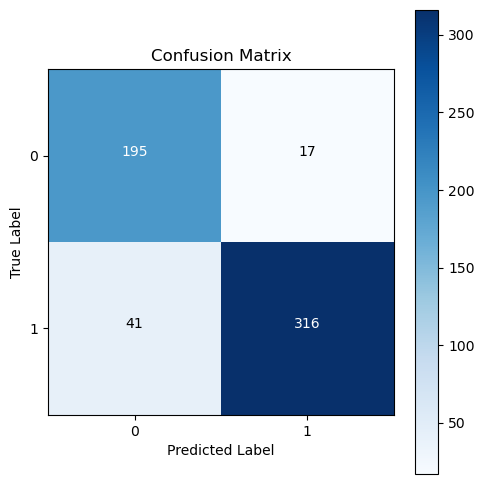

In [ ]:
# # SUSSSSSSSSSS
cm,_ = df.iloc[0]["Confusion Matrix"]
classes = np.unique(y)

plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Show numbers inside cells
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


## Experiment 5: K-Means after Autoencoder

In [ ]:
# AE + KMeans++ results
results_ae = []

for b in bottleneck_sizes:
    ae = Autoencoder(
        input_dim=X_scaled.shape[1],
        hidden_dims=[30, 15, 10],
        bottleneck_dim=b,
        activation='relu',
        output_activation='tanh'
    )
    ae.train(X_scaled, epochs=100, batch_size=32, lr=0.001, lr_decay=0.95, l2_lambda=0.001)
    X_encoded = ae.encode(X_scaled)
    recon_error = np.mean((X_scaled - ae.forward(X_scaled)) ** 2)

    labels, centroids, final_inertia, inertia_history, n_iters = k_means(
        X_encoded,
        K=optimal_k,
        init='kmeans++',
        tolerance=1e-4,
        random_state=42
    )

    sil = silhouette_score(X_encoded, labels)
    db = davies_bouldin_index(X_encoded, labels)
    ch = calinski_harabasz_index(X_encoded, labels)
    wcss = within_cluster_sum_of_squares(X_encoded, labels, centroids)

    ari = adjusted_rand_index(y, labels)
    nmi = normalized_mutual_info(y, labels)
    pur = purity(y, labels)
    cm = confusion_matrix_from_clustering(y, labels)

    results_ae.append({
        "Bottleneck Size": b,
        "Reconstruction Error (MSE)": recon_error,
        "K-Means Inertia": final_inertia,
        "Iterations": n_iters + 1,
        "Silhouette Score": sil,
        "Davies-Bouldin Index": db,
        "Calinski-Harabasz Index": ch,
        "WCSS": wcss,
        "Adjusted Rand Index": ari,
        "Normalized Mutual Information": nmi,
        "Purity": pur,
        "Confusion Matrix": cm
    })

# AE + KMeans Random results
results_ae_random = []

for b in bottleneck_sizes:
    ae = Autoencoder(
        input_dim=X_scaled.shape[1],
        hidden_dims=[30, 15, 10],
        bottleneck_dim=b,
        activation='relu',
        output_activation='tanh'
    )
    ae.train(X_scaled, epochs=100, batch_size=32, lr=0.001, lr_decay=0.95, l2_lambda=0.001)
    X_encoded = ae.encode(X_scaled)
    recon_error = np.mean((X_scaled - ae.forward(X_scaled)) ** 2)

    labels, centroids, final_inertia, inertia_history, n_iters = k_means(
        X_encoded,
        K=optimal_k,
        init='random',
        tolerance=1e-4,
        random_state=42
    )

    sil = silhouette_score(X_encoded, labels)
    db = davies_bouldin_index(X_encoded, labels)
    ch = calinski_harabasz_index(X_encoded, labels)
    wcss = within_cluster_sum_of_squares(X_encoded, labels, centroids)

    ari = adjusted_rand_index(y, labels)
    nmi = normalized_mutual_info(y, labels)
    pur = purity(y, labels)
    cm = confusion_matrix_from_clustering(y, labels)

    results_ae_random.append({
        "Bottleneck Size": b,
        "Reconstruction Error (MSE)": recon_error,
        "K-Means Inertia": final_inertia,
        "Iterations": n_iters + 1,
        "Silhouette Score": sil,
        "Davies-Bouldin Index": db,
        "Calinski-Harabasz Index": ch,
        "WCSS": wcss,
        "Adjusted Rand Index": ari,
        "Normalized Mutual Information": nmi,
        "Purity": pur,
        "Confusion Matrix": cm
    })


Epoch 1, Loss: 1.388975
Epoch 10, Loss: 1.233369
Epoch 20, Loss: 1.156629
Epoch 30, Loss: 1.124113
Epoch 40, Loss: 1.107920
Epoch 50, Loss: 1.099222
Epoch 60, Loss: 1.094401
Epoch 70, Loss: 1.091679
Epoch 80, Loss: 1.090112
Epoch 90, Loss: 1.089195
Epoch 100, Loss: 1.088651
kmeans++: Runtime: 0.1065 seconds
Epoch 1, Loss: 1.273169
Epoch 10, Loss: 1.163989
Epoch 20, Loss: 1.115414
Epoch 30, Loss: 1.093784
Epoch 40, Loss: 1.082854
Epoch 50, Loss: 1.076957
Epoch 60, Loss: 1.073654
Epoch 70, Loss: 1.071788
Epoch 80, Loss: 1.070693
Epoch 90, Loss: 1.070041
Epoch 100, Loss: 1.069654
kmeans++: Runtime: 0.1438 seconds
Epoch 1, Loss: 1.381324
Epoch 10, Loss: 1.219392
Epoch 20, Loss: 1.144461
Epoch 30, Loss: 1.112183
Epoch 40, Loss: 1.096714
Epoch 50, Loss: 1.088537
Epoch 60, Loss: 1.084043
Epoch 70, Loss: 1.081500
Epoch 80, Loss: 1.080027
Epoch 90, Loss: 1.079155
Epoch 100, Loss: 1.078636
kmeans++: Runtime: 0.0916 seconds
Epoch 1, Loss: 1.209431
Epoch 10, Loss: 1.124127
Epoch 20, Loss: 1.089673

In [ ]:
import pandas as pd

df_kpp_ae = pd.DataFrame(results_ae)  # K-Means++ AE results
df_random_ae = pd.DataFrame(results_ae_random)  # Random AE results


In [ ]:
display(
    df_kpp_ae.style.set_caption("AE + K-Means++ Initialization").hide(axis="index").hide(subset="Confusion Matrix",axis=True)
               .format({
                   "Bottleneck Size": "{:d}",
                   "Reconstruction Error (MSE)": "{:.4f}",
                   "K-Means Inertia": "{:.2f}",
                   "Silhouette Score": "{:.4f}",
                   "Davies-Bouldin Index": "{:.4f}",
                   "Calinski-Harabasz Index": "{:.2f}",
                   "WCSS": "{:.2f}",
                   "Adjusted Rand Index": "{:.4f}",
                   "Normalized Mutual Information": "{:.4f}",
                   "Purity": "{:.4f}"
               }),
    df_random_ae.style.set_caption("AE + Random Initialization").hide(axis="index").hide(subset="Confusion Matrix",axis=True)
                  .format({
                      "Bottleneck Size": "{:d}",
                      "Reconstruction Error (MSE)": "{:.4f}",
                      "K-Means Inertia": "{:.2f}",
                      "Silhouette Score": "{:.4f}",
                      "Davies-Bouldin Index": "{:.4f}",
                      "Calinski-Harabasz Index": "{:.2f}",
                      "WCSS": "{:.2f}",
                      "Adjusted Rand Index": "{:.4f}",
                      "Normalized Mutual Information": "{:.4f}",
                      "Purity": "{:.4f}"
                  })
)


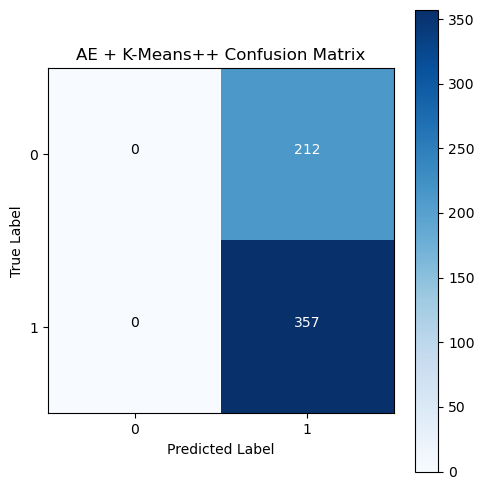

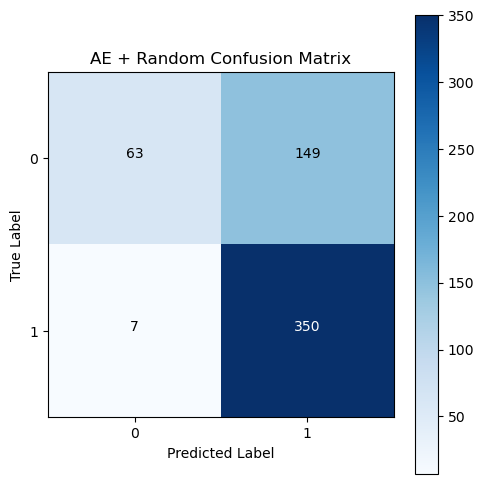

In [ ]:
# tttttttttttttttt
import matplotlib.pyplot as plt
import numpy as np

# K-Means++ AE
cm = df_kpp_ae["Confusion Matrix"].iloc[0]
cm = np.array(cm[0])
classes = np.unique(y)

plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("AE + K-Means++ Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Random AE
cm = df_random_ae["Confusion Matrix"].iloc[0]
cm = np.array(cm[0])

plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("AE + Random Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


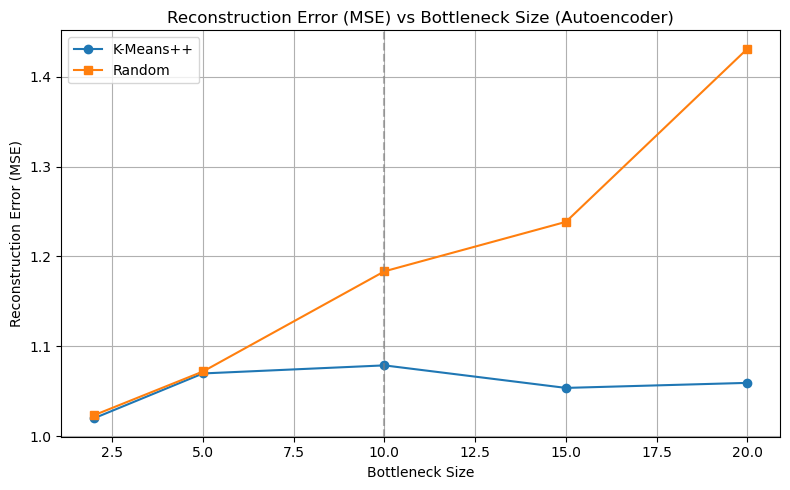

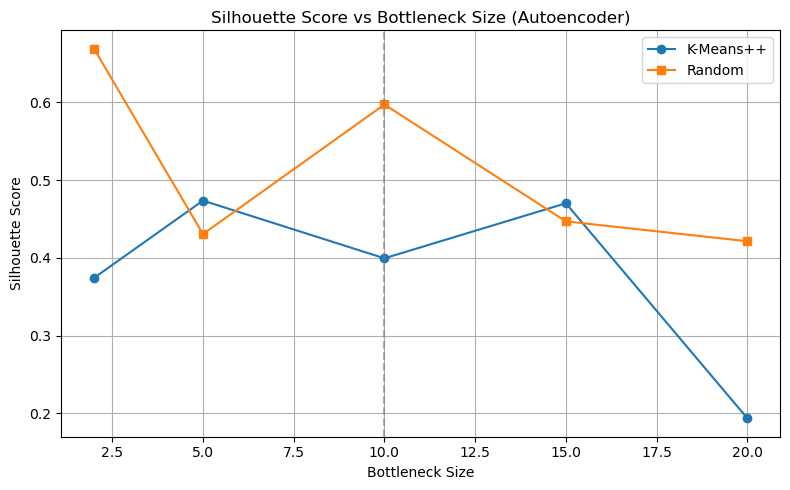

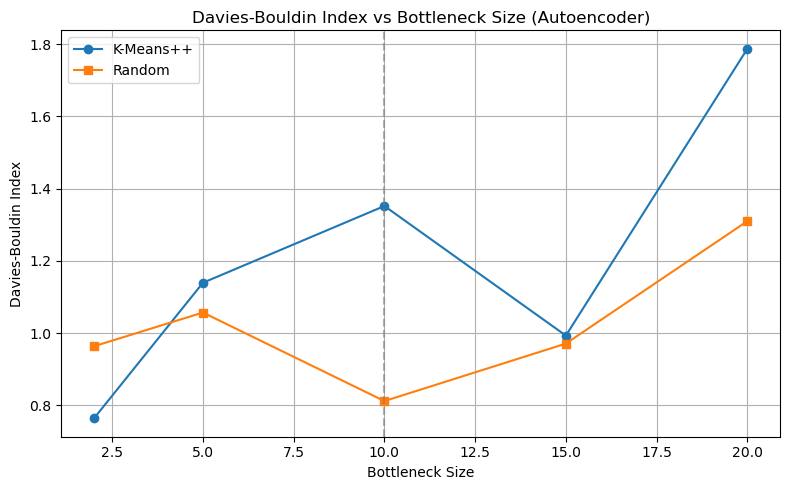

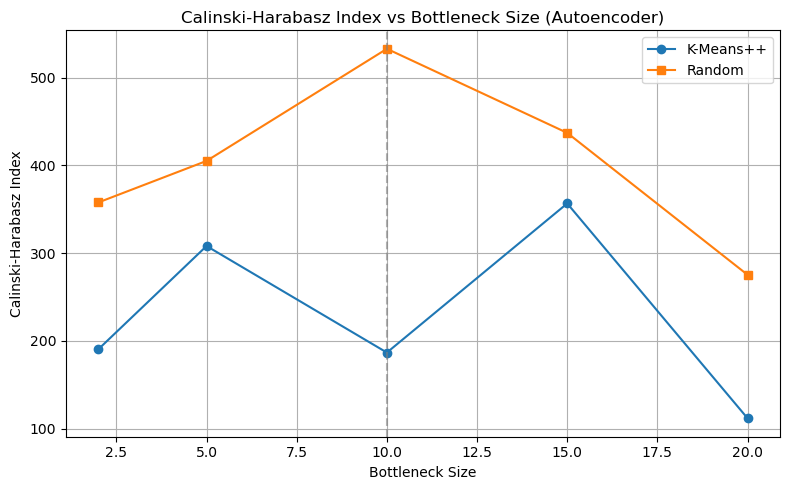

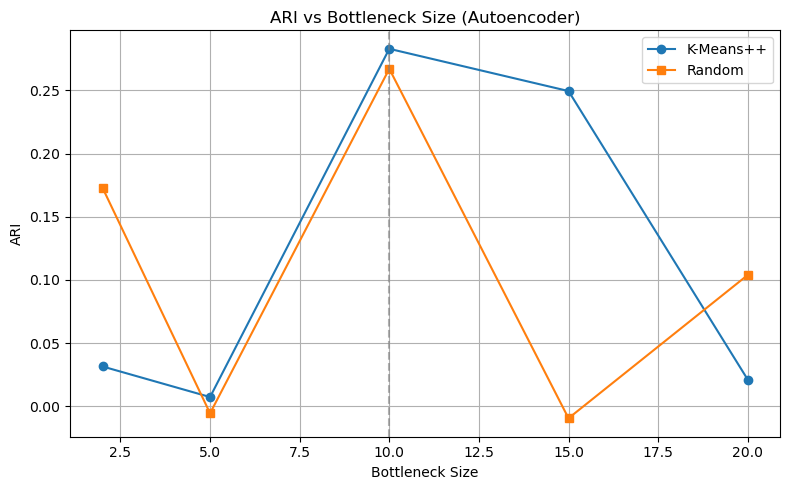

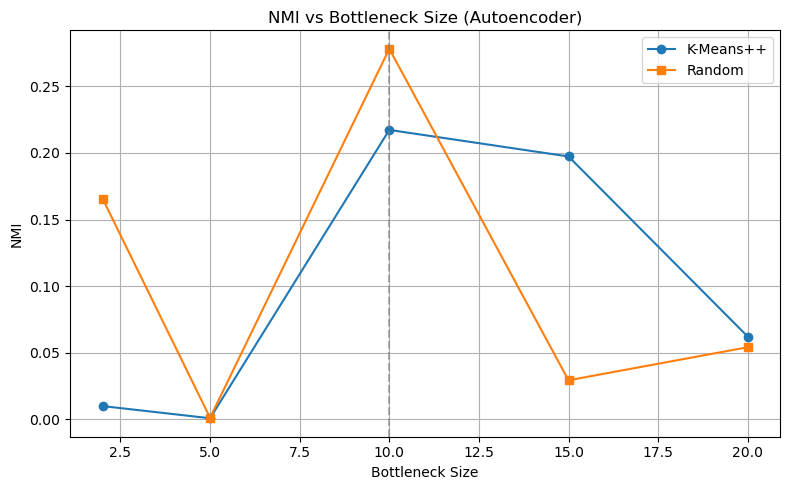

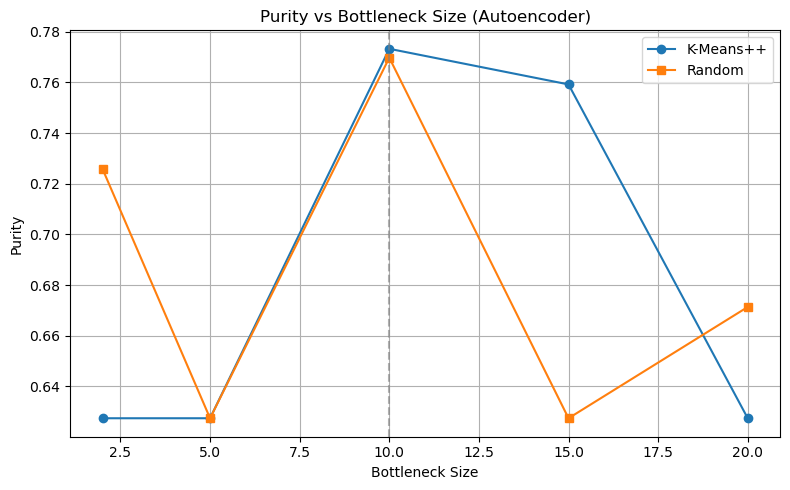

In [ ]:
metrics = [
    ("Reconstruction Error (MSE)", "Reconstruction Error (MSE)"),
    ("Silhouette Score", "Silhouette Score"),
    ("Davies-Bouldin Index", "Davies-Bouldin Index"),
    ("Calinski-Harabasz Index", "Calinski-Harabasz Index"),
    ("Adjusted Rand Index", "ARI"),
    ("Normalized Mutual Information", "NMI"),
    ("Purity", "Purity")
]

for col, label in metrics:
    plt.figure(figsize=(8,5))

    # AE + KMeans++
    plt.plot(df_kpp_ae["Bottleneck Size"], df_kpp_ae[col], marker='o', label="K-Means++")

    # AE + Random
    plt.plot(df_random_ae["Bottleneck Size"], df_random_ae[col], marker='s', label="Random")

    plt.xlabel("Bottleneck Size")
    plt.ylabel(label)
    plt.title(f"{label} vs Bottleneck Size (Autoencoder)")
    plt.axvline(x=10, linestyle='--', alpha=0.6, color='gray')  # reference line
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
bottleneck_sizes = [2, 5, 10, 15, 20]
cov_types = ['full', 'tied', 'diag', 'spherical']
results_ae_gmm = []

for b in bottleneck_sizes:
    # --- Train Autoencoder and encode data ---
    ae = Autoencoder(input_dim=X_scaled.shape[1],
                     hidden_dims=[30, 15, 10],
                     bottleneck_dim=b,
                     activation='relu',
                     output_activation='tanh')
    ae.train(X_scaled, epochs=100, batch_size=32, lr=0.001)
    X_encoded = ae.encode(X_scaled)

    for cov_type in ['full', 'tied', 'diagonal', 'spherical']:

        gmm = GMM(n_mixtures=best_n_mixtures,
                  covariance_type=cov_type,
                  max_iter=100,
                  tolerance=1e-4)

        gmm.fit(X_encoded)

        # Get cluster labels from GMM responsibilities
        R = gmm.responsibilities
        labels = np.argmax(R, axis=1) # assign each point to the cluster with highest responsibility


        # Internal metrics
        sil = silhouette_score(X_encoded, labels)
        db  = davies_bouldin_index(X_encoded, labels)
        ch  = calinski_harabasz_index(X_encoded, labels)
        wcss = within_cluster_sum_of_squares(X_encoded, labels, gmm.means)

        # External metrics
        ari = adjusted_rand_index(y, labels)
        nmi = normalized_mutual_info(y, labels)
        pur = purity(y, labels)

        bic = BIC_gmm(X_encoded, gmm)
        aic = AIC_gmm(X_encoded, gmm)
        ll  = log_likelihood_gmm(X_encoded, gmm)
        cm = confusion_matrix_from_clustering(y, labels)

        results_gmm.append({
            "Bottleneck Size": b,
            "Covariance": cov_type,
            "Log-Likelihood": ll,
            "AIC": aic,
            "BIC": bic,
            "Silhouette": sil,
            "Davies-Bouldin": db,
            "Calinski-Harabasz": ch,
            "ARI": ari,
            "NMI": nmi,
            "Purity": pur,
            "Iterations": len(gmm.log_likelihood_history),
            "Confusion Matrix": cm
        })



Epoch 1, Loss: 1.221859
Epoch 10, Loss: 1.071269
Epoch 20, Loss: 1.036143
Epoch 30, Loss: 1.024633
Epoch 40, Loss: 1.019757
Epoch 50, Loss: 1.017263
Epoch 60, Loss: 1.015923
Epoch 70, Loss: 1.015166
Epoch 80, Loss: 1.014733
Epoch 90, Loss: 1.014477
Epoch 100, Loss: 1.014328
converged at iteration 1
converged at iteration 1


/var/folders/nh/zvnyhcjn4q9fdn_rjthdmf580000gn/T/ipykernel_30315/12761715.py:27: RuntimeWarning: invalid value encountered in scalar divide
  ch_index = (B / (n_clusters - 1)) / (W / (n_samples - n_clusters))


converged at iteration 19
converged at iteration 20
Epoch 1, Loss: 1.527783
Epoch 10, Loss: 1.293544
Epoch 20, Loss: 1.192435
Epoch 30, Loss: 1.156606
Epoch 40, Loss: 1.139422
Epoch 50, Loss: 1.130030
Epoch 60, Loss: 1.124908
Epoch 70, Loss: 1.122004
Epoch 80, Loss: 1.120315
Epoch 90, Loss: 1.119327
Epoch 100, Loss: 1.118738
converged at iteration 23
converged at iteration 17
converged at iteration 37
converged at iteration 19
Epoch 1, Loss: 1.098071
Epoch 10, Loss: 1.068720
Epoch 20, Loss: 1.054074
Epoch 30, Loss: 1.046626
Epoch 40, Loss: 1.042790
Epoch 50, Loss: 1.040627
Epoch 60, Loss: 1.039391
Epoch 70, Loss: 1.038675
Epoch 80, Loss: 1.038255
Epoch 90, Loss: 1.038007
Epoch 100, Loss: 1.037860
converged at iteration 45
converged at iteration 12
converged at iteration 28
converged at iteration 36
Epoch 1, Loss: 1.307893
Epoch 10, Loss: 1.200819
Epoch 20, Loss: 1.149812
Epoch 30, Loss: 1.126992
Epoch 40, Loss: 1.115500
Epoch 50, Loss: 1.109192
Epoch 60, Loss: 1.105651
Epoch 70, Loss: 

Empty DataFrame
Columns: []
Index: []

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

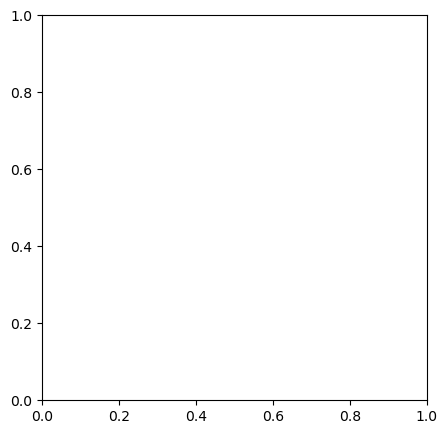

In [ ]:

# # --- Convert results to DataFrame ---
# df_ae_gmm = pd.DataFrame(results_ae_gmm)
# display(df_ae_gmm)

# # # --- Example: Confusion Matrix for first row ---
# # cm = df_ae_gmm.iloc[0]["Confusion Matrix"]
# # classes = np.unique(y)

# plt.figure(figsize=(5,5))
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.colorbar()
# tick_marks = np.arange(len(classes))
# plt.xticks(tick_marks, classes)
# plt.yticks(tick_marks, classes)

# thresh = cm.max() / 2
# for i in range(cm.shape[0]):
#     for j in range(cm.shape[1]):
#         plt.text(j, i, format(cm[i, j], 'd'),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.tight_layout()
# plt.show()

# # --- Plot metrics vs Bottleneck Size for each Covariance Type ---
# metrics = ["BIC", "AIC", "Log-Likelihood", "Silhouette",
#            "Davies-Bouldin", "Calinski-Harabasz", "WCSS",
#            "ARI", "NMI", "Purity"]

# for metric in metrics:
#     plt.figure(figsize=(8,5))
#     for cov in df_ae_gmm['Covariance Type'].unique():
#         subset = df_ae_gmm[df_ae_gmm['Covariance Type'] == cov]
#         plt.plot(subset['Bottleneck Size'], subset[metric], marker='o', label=cov)
#     plt.xlabel("Bottleneck Size")
#     plt.ylabel(metric)
#     plt.title(f"{metric} vs Bottleneck Size for different Covariance Types")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

## 2D Visualization of Clusters

In [ ]:
import matplotlib.pyplot as plt

def plot_2D_projection(X_2D, labels, title="2D Projection", method="PCA"):
    plt.figure(figsize=(7,6))
    scatter = plt.scatter(X_2D[:,0], X_2D[:,1], c=labels, cmap='tab10', s=50, alpha=0.7)
    plt.xlabel(f"{method} Dimension 1")
    plt.ylabel(f"{method} Dimension 2")
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


kmeans++: Runtime: 0.0656 seconds


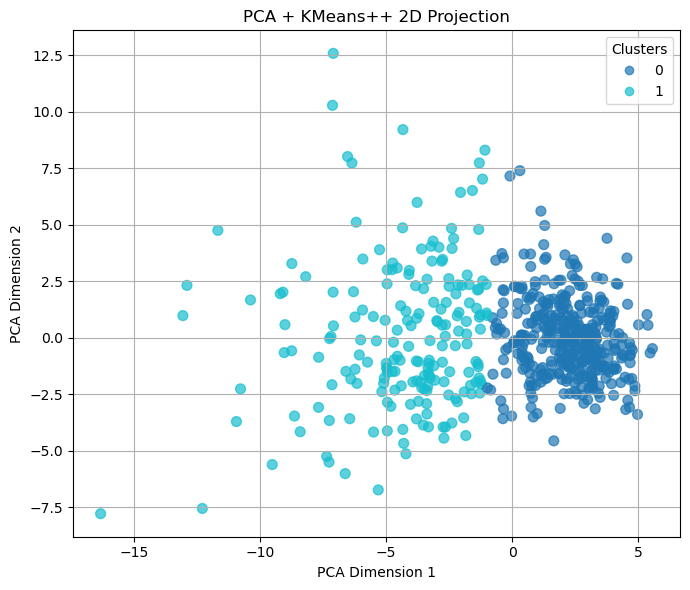

random: Runtime: 0.0746 seconds


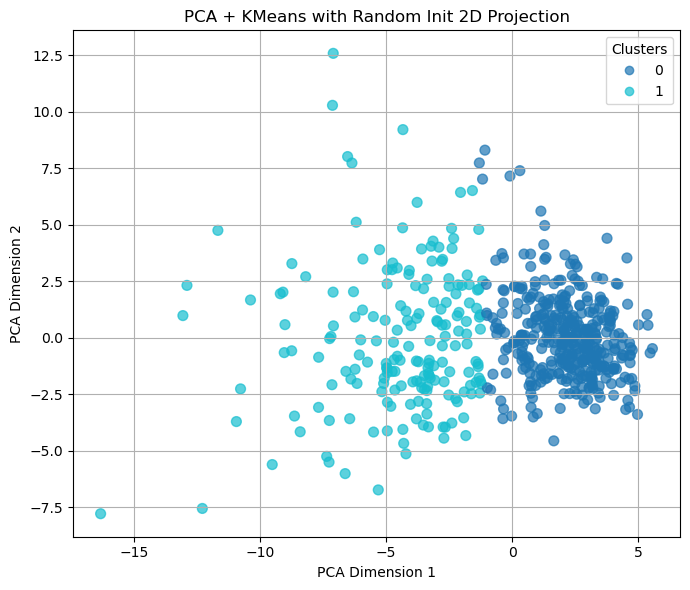

converged at iteration 39


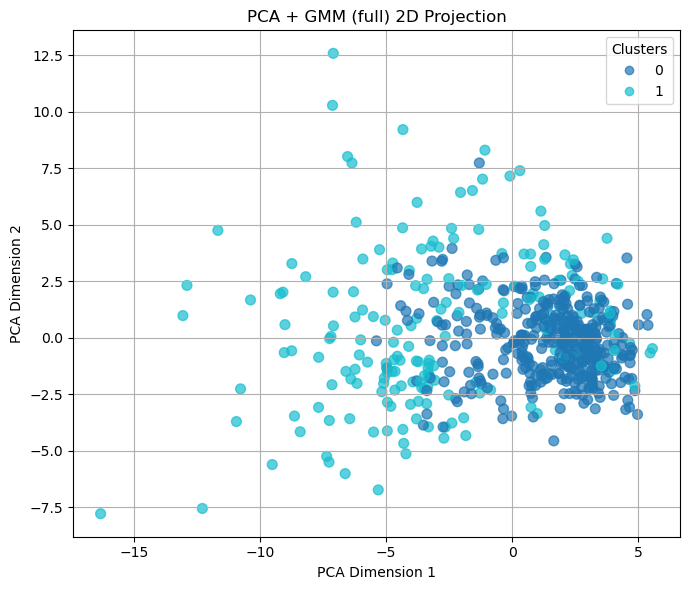

converged at iteration 92


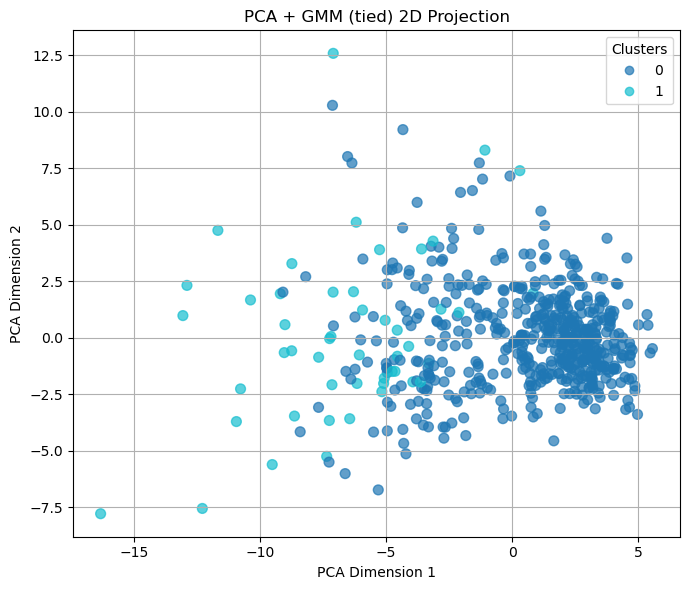

converged at iteration 39


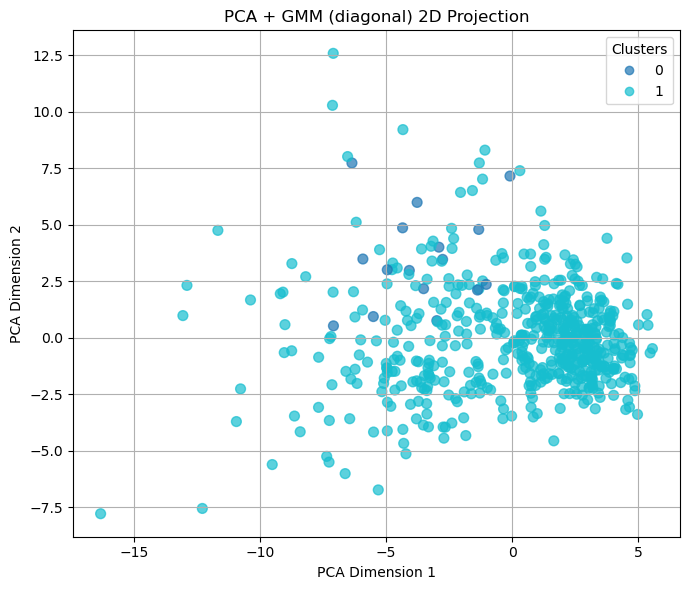

converged at iteration 17


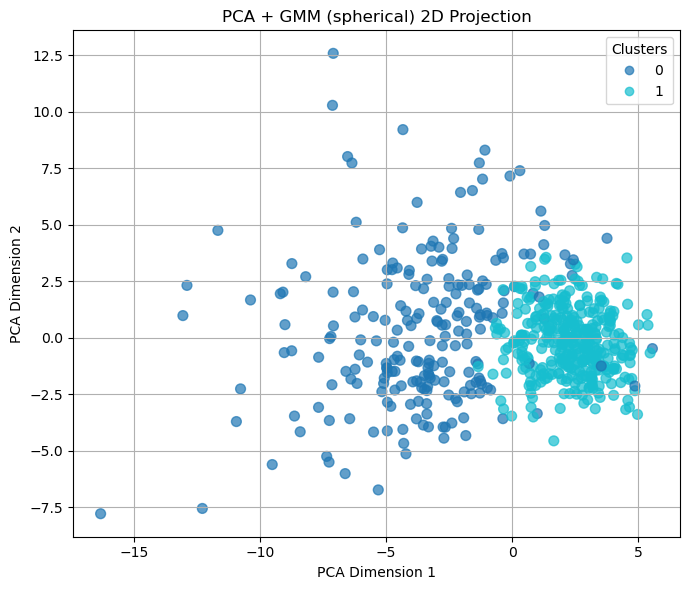

In [ ]:
# 2D PCA projection

# PCA + KMeans++
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca_2D = pca.transform(X_scaled)
labels_pp, centroids_pp, inertia_pp, history_pp, n_iter_pp = k_means(
    X_scaled, K=2, random_state=42, init='kmeans++')
labels_kpp = df_kpp["Silhouette Score"].index
plot_2D_projection(
    X_pca_2D,
    labels_pp,
    title="PCA + KMeans++ 2D Projection",
    method="PCA"
)

# PCA + KMeans Random
labels_pp, centroids_pp, inertia_pp, history_pp, n_iter_pp = k_means(
    X_scaled, K=2, random_state=42, init='random')
labels_kpp = df_kpp["Silhouette Score"].index
plot_2D_projection(
    X_pca_2D,
    labels_pp,
    title="PCA + KMeans with Random Init 2D Projection",
    method="PCA"
)

# PCA + GMM

for cov_type in ['full', 'tied', 'diagonal', 'spherical']:

        gmm = GMM(n_mixtures=best_n_mixtures,
                  covariance_type=cov_type,
                  max_iter=100,
                  tolerance=1e-4)

        gmm.fit(X_pca)

        # Get cluster labels from GMM responsibilities
        R = gmm.responsibilities
        labels = np.argmax(R, axis=1) # assign each point to the cluster with highest responsibility

        plot_2D_projection(
            X_pca_2D,
            labels,
            title=f"PCA + GMM ({cov_type}) 2D Projection",
            method="PCA"
        )

In [ ]:
# ae = Autoencoder(
#         input_dim=X_scaled.shape[1],
#         hidden_dims=[30, 15, 10],
#         bottleneck_dim=5,
#         activation='relu',
#         output_activation='tanh'
#     )

# ae.train(X_scaled, epochs=1000, batch_size=32, lr=0.001, lr_decay=0.995, l2_lambda=0.001)
# X_encoded = ae.encode(X_scaled)

# for cov in ['full', 'tied', 'diag', 'spherical']:
#     k = 3
#     gmm = GMM(n_mixtures=k, covariance_type=cov, max_iter=200, tolerance=1e-4)
#     gmm.fit(X_encoded)
#     R = gmm.responsibilities
#     labels = np.argmax(R, axis=1)

#     plot_2D_projection(
#         X_encoded,
#         labels,
#         title=f"AE (bottleneck=5) + GMM ({cov}) 2D Projection",
#         method="Encoded Space"
#     )



In [ ]:
plt.figure(figsize=(10, 5))

for cov in df_ae_gmm['Covariance Type'].unique():
    subset = df_ae_gmm[df_ae_gmm['Covariance Type'] == cov]
    plt.plot(subset['Bottleneck Size'], subset['BIC'], marker='o', label=f"BIC-{cov}")

plt.xlabel("Bottleneck Size")
plt.ylabel("BIC")
plt.title("BIC vs Bottleneck Size for GMM (AE Latent Space)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'df_ae_gmm' is not defined

<Figure size 1000x500 with 0 Axes>